# Cars Prices with Multiple Linear Regression and RFE

## Problem Description
A Chinese automobile company **Teclov_chinese** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

   **1. Cleaning Data**
   
   **2. Exploratory of Data**
   
   **3. Data preparation**
   
   **4. Model Construction**
   
   **5. Prediction & Evaluation**
      
   **6. Final Summary**

In [143]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns

#pour afficher tous les colonnes d'un tableau
pd.set_option('display.max_columns', None)

# Read Data


In [144]:
data = pd.read_csv('CarPrice_Assignment.csv')
print("Dimension of our data set is: ")
print(data.shape)
data.head()

Dimension of our data set is: 
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.head().append(data.tail())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**** Dataset is clean and no substitution of Null values is required ****



# Cleaning Data


**1. Separate the CarName variable into one column: CompanyName**

In [145]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])

In [146]:
data['CompanyName'] = CompanyName

In [147]:
data['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

But there is another variable that is not considered categorical. It's the column "CompanyName".
Let's see are there any repetitive values?

In [8]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In reviewing the above data, we found that few company names were identical but misspelled, such as:

1. 'maxda' Et 'mazda' ================> mazda
2. 'porsche' Et 'porcshce' ===========> porsche
3. 'toyota' Et 'toyouta' =============> toyota
4. 'vokswagen' Et 'volkswagen','vw' ==> volkswagen
5. 'Nissan' Et 'nissan' ==============> 'nissan'

So we have to adjust things by replacing the values with one identical variable:

In [9]:
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")

In [10]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Exploratory of Data

Since the independent variable (i.e Price) is continuous numerical variable, and there is many dependat variables, we we will use Multiple linear regression

# Dependent variable visualization: Price

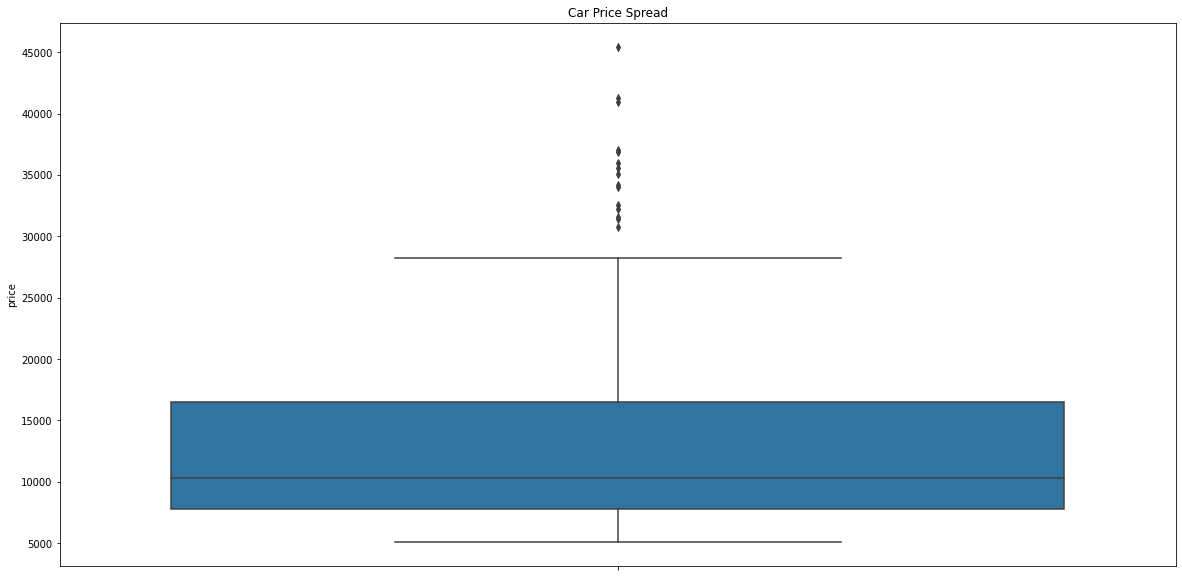

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [11]:
plt.title('Car Price Spread')
sns.boxplot(y=data.price)
plt.show()
print(data.price.describe())

According to the box-mustache, the price field has an average **around 13K** and a **median around 10k** with the most expensive **car values at 45k** and the **cheapest cars at 5k**.

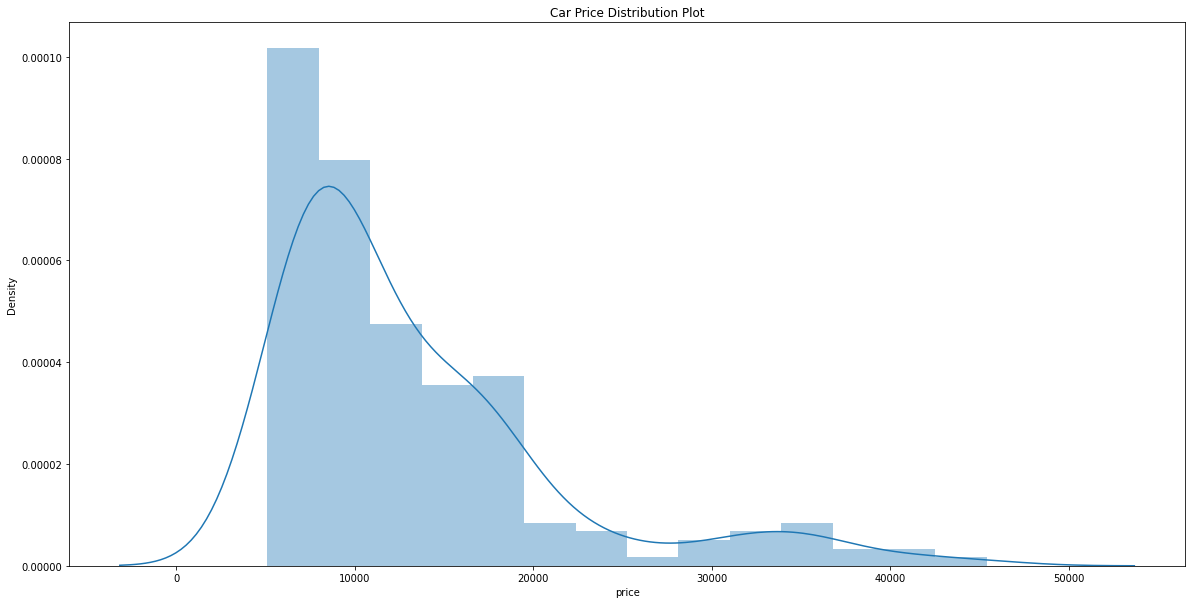

In [12]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

**Conclusion**

Most of the prices offered by this company are low.

In [13]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


# Visualization of independent variables:

**I. Check the linear relationship between the dependent variable "Price" and the numerical independent variables**

Draw XY scatter plot, and check are they linear or not?

In [14]:
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis,y_axis) :
    sns.pairplot(data,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

In [15]:
y_vars=['price']

**Price VS Wheelbase - curbweight - boreratio**

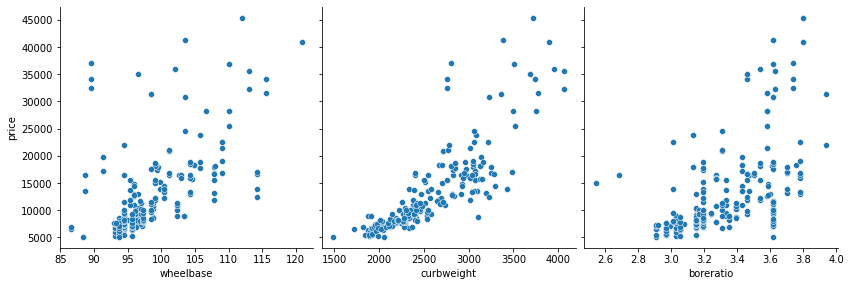

At first glance, the 3 variables are positively correlated but spread at higher values.

We can make sure of this by looking at the Coefficient of Correlation

Coefficient of Correlation between Price and wheelbase: 57.78155982921501 %
Correlation coefficient between Price and curbweight: 83.53048793372967 %
Correlation coefficient between Price and boreratio:  55.317323679844364 %


In [16]:
x_vars=['wheelbase','curbweight','boreratio']
pairplot(x_vars,y_vars)
print("At first glance, the 3 variables are positively correlated but spread at higher values.")

p1=data['wheelbase']
p2=data['curbweight']
p3=data['boreratio']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCoefficient of Correlation between Price and wheelbase:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and curbweight:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and boreratio: ',pearson_coeff*100,'%')

**Price VS carlength - carwidth - carheight**

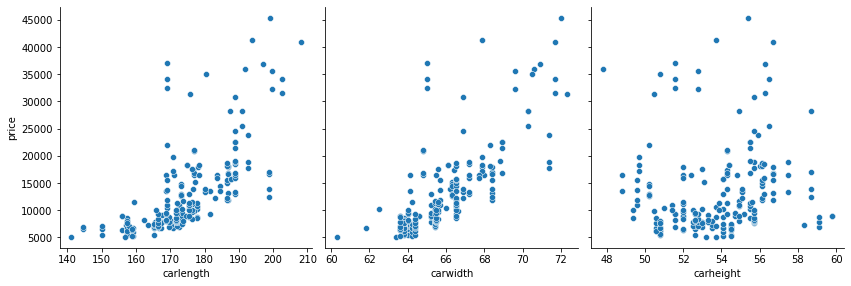

Carlength and Carwidth are more correlated than carheight which is more spread out but positive.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and carlength: 68.2920015677962 %
Correlation coefficient between Price and carwidth:  75.93252997415115 %
Correlation coefficient between Price and carheight:  11.933622657049444 %


In [17]:
x_vars=['carlength','carwidth', 'carheight']
pairplot(x_vars,y_vars)
print("Carlength and Carwidth are more correlated than carheight which is more spread out but positive.")

p1=data['carlength']
p2=data['carwidth']
p3=data['carheight']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and carlength:',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and carwidth: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and carheight: ',pearson_coeff*100,'%')

**Price VS enginesize - horsepower - stroke**

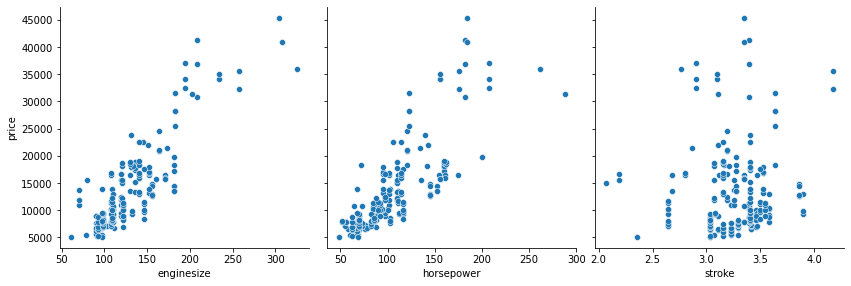

Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and enginesize:  87.41448025245117 %
Correlation coefficient between Price and horsepower:  80.81388225362215 %
Correlation coefficient between Price and stroke:  7.9443083881931 %


In [18]:
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)
print("Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).")

p1=data['enginesize']
p2=data['horsepower']
p3=data['stroke']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and stroke: ',pearson_coeff*100,'%')

**Price VS compressionratio - peakrpm - symboling**

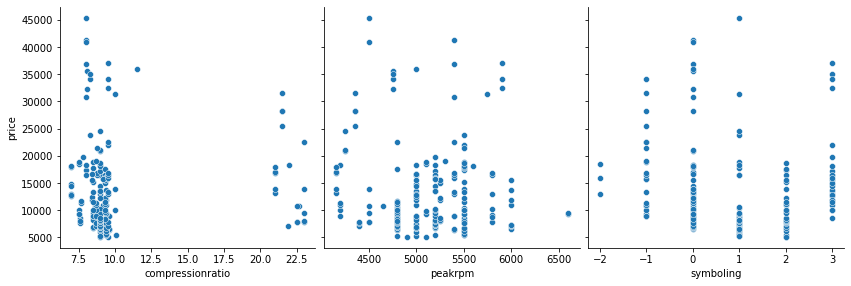

Compressionratio, Peakrpm and symboling are not correlated.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and compressionratio:  6.798350579944263 %
Correlation coefficient between Price and peakrpm:  -8.526715027785688 %
Correlation coefficient between Price and symboling:  -7.997822464270349 %


In [19]:
x_vars=['compressionratio','peakrpm',"symboling"]
pairplot(x_vars,y_vars)
print("Compressionratio, Peakrpm and symboling are not correlated.")

p1=data['compressionratio']
p2=data['peakrpm']
p3=data['symboling']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and compressionratio: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and peakrpm: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and symboling: ',pearson_coeff*100,'%')

**Price VS citympg - highwaympg**

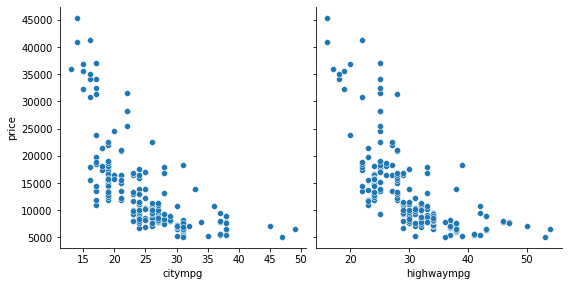

Citympg & Highwaympg are negatively correlated.
The more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and citympg:  -68.57513360270397 %
Correlation coefficient between Price and highwaympg:  -69.75990916465562 %


In [20]:
x_vars=['citympg', 'highwaympg']
pairplot(x_vars,y_vars)
print('Citympg & Highwaympg are negatively correlated.\nThe more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.')

p1=data['citympg']
p2=data['highwaympg']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and citympg: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and highwaympg: ',pearson_coeff*100,'%')

**Conclusion**

(+) positively correlated variables with Price: **wheelbase, carlenght, carwidth, curbweight, enginesize, boreratio, horesepower**

(-) negatively correlated variables with Price: **citympg, highwaympg**

These variables should be kept for a better model, and the other variables should be ignored as they are not correlated with Price

**II. Checking the multicollinearity between the correlated independent variables above and Price**

In [21]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

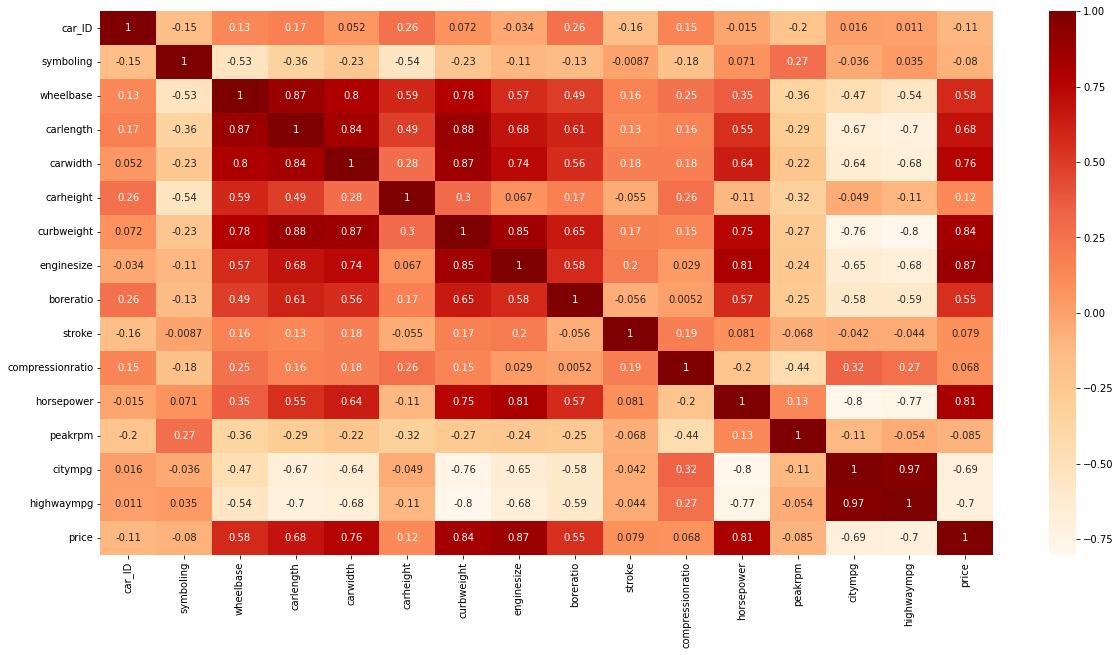

In [22]:
heatmap(20,12,data)

   **a. Examination of the correlation between the variables specific to the dimensions of a car i.e. weight, height etc**

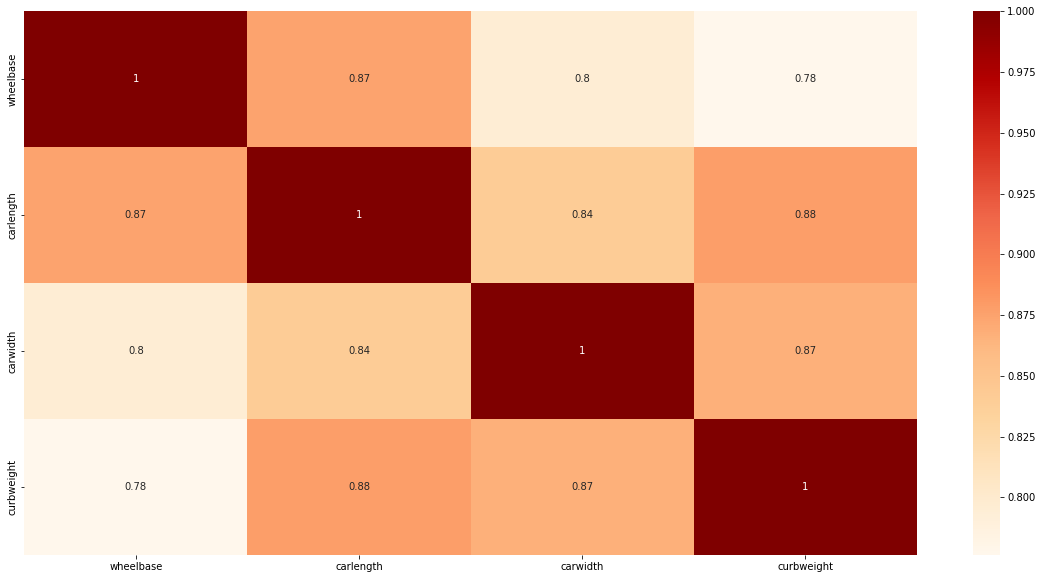

In [23]:
dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']

heatmap(10,10,data.filter(dimension_col_list))

**Wheelbase** , **carlength**, **carwidth** et **curbweight** [ 0.80 - 0.88 ] are very correlated and we have to keep only one between them.

**b. Examination of the correlation between the variables specific to the performance of a car**

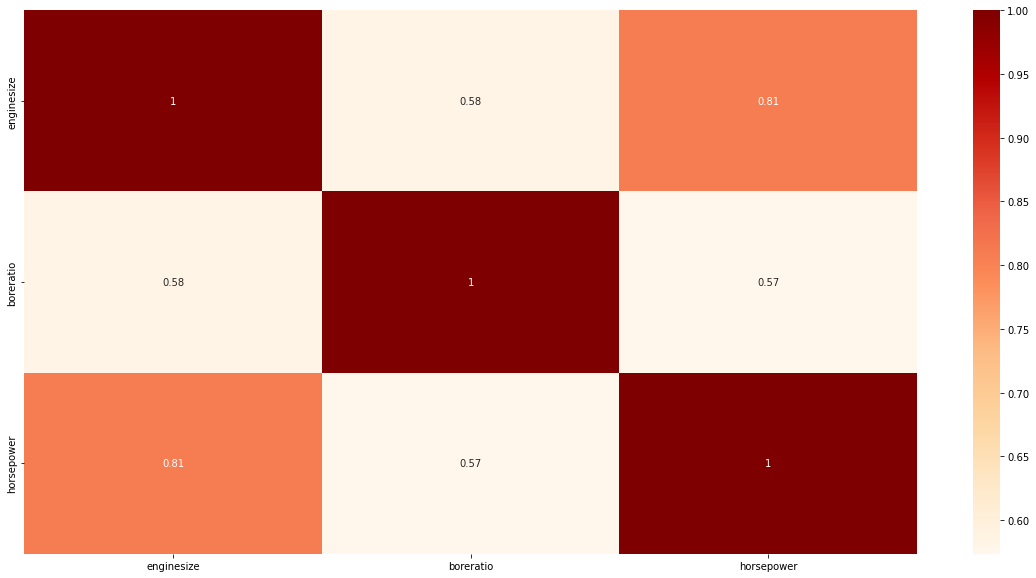

In [24]:
performance_col_list = ['enginesize','boreratio','horsepower']
heatmap(10,10,data.filter(performance_col_list))

**Horsepower** and **enginesize** are highly correlated and we need to keep only one.

**c. Examining the correlation between citympg and highwaympg**

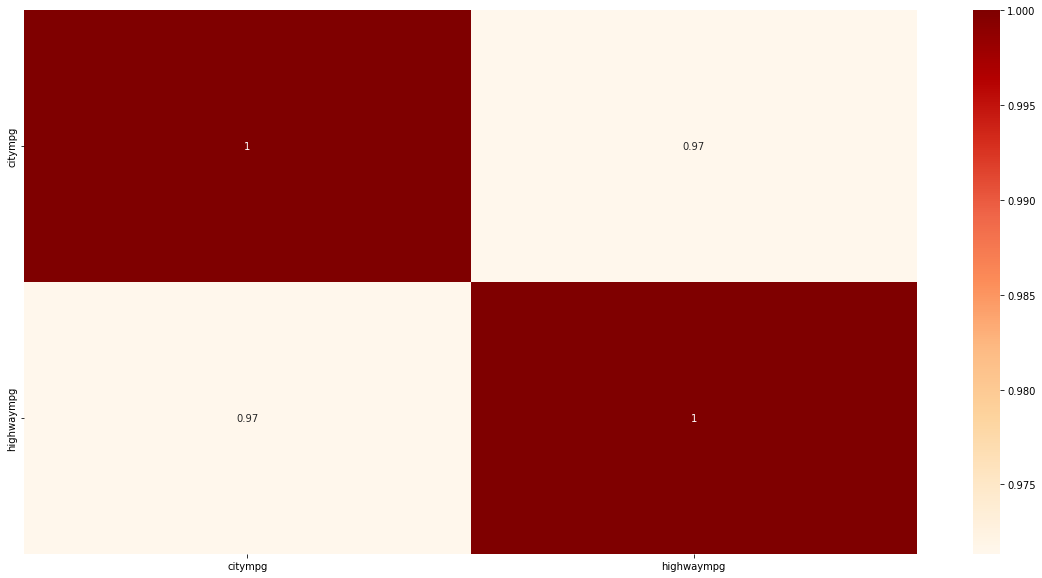

In [25]:
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

**citympg** and **highwaympg** are highly correlated and we need to keep one of them.

**Price VS CompanyName**

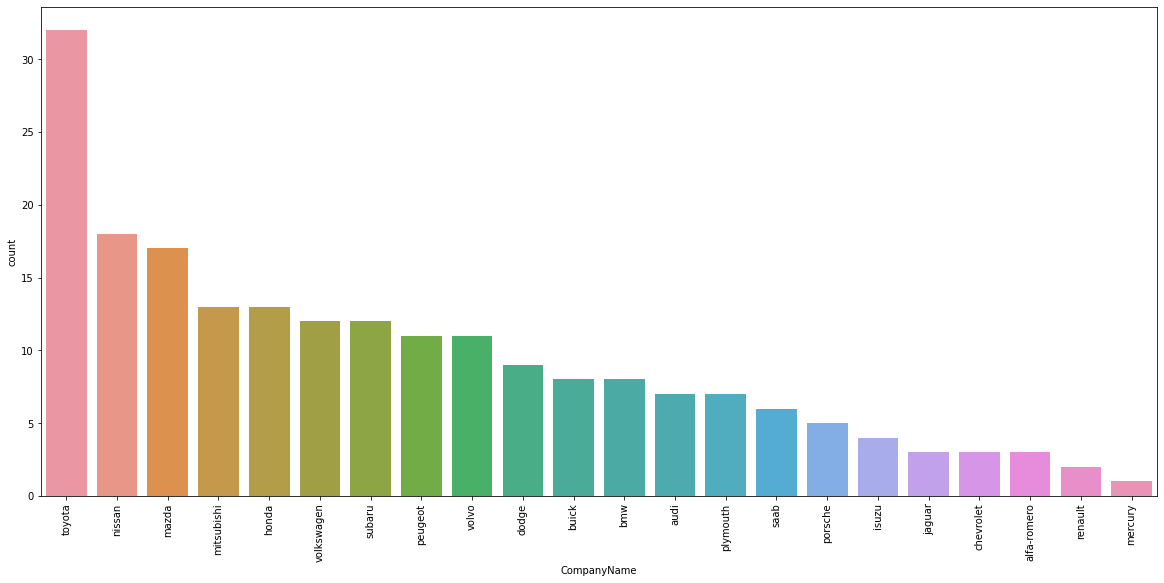

In [26]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

Looking at the above histogram, **Toyota** seems to be very popular, followed by **Nissan** and **Mazda**.

**Price VS fueltype**

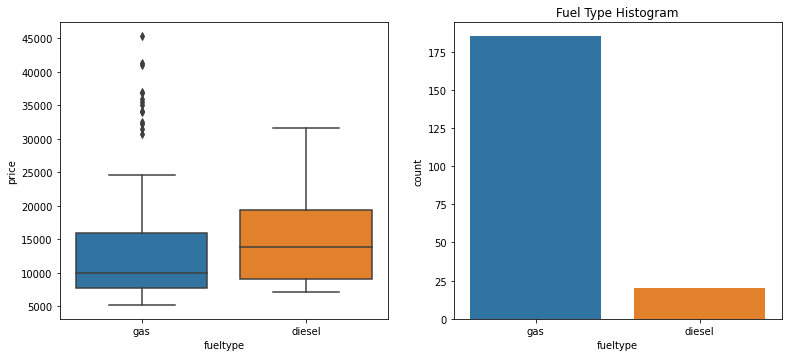

In [27]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

The average price of a **diesel car** is higher than that of **gas cars**, which explains, according to the histogram, why the company sold more **gas cars** than **diesel cars**.

**Price VS aspiration**

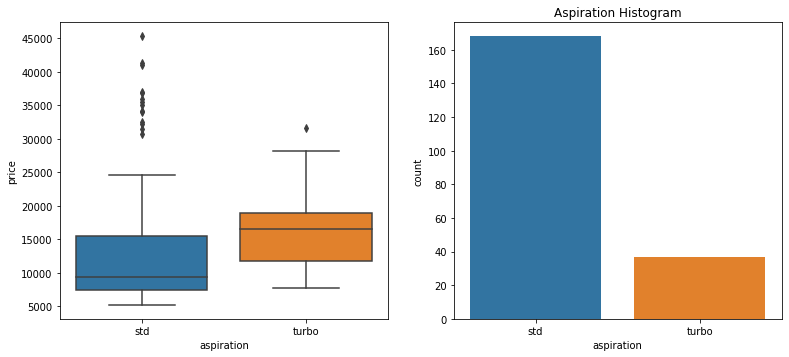

In [28]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)

plt.show()

The average price of cars with **turbo** aspiration is higher than that of **standard** aspiration, which explains, according to the histogram, why the company sells cars with **standard** aspiration more than of cars with **turbo** aspiration.

**Price VS doornumber**

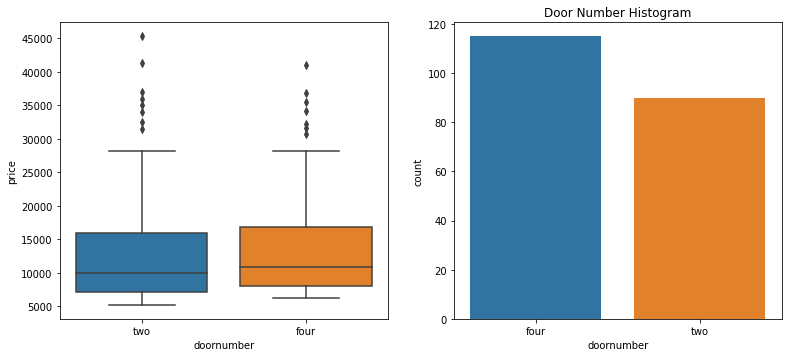

In [29]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)

plt.show()

**doornumber** values are pretty close, which means the price is not affected by **doornumber**

**Price VS enginelocation**

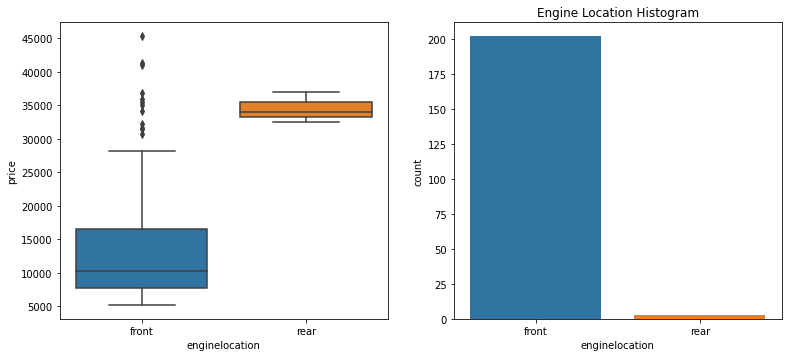

In [30]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)

plt.show()

It is clear that **rear cars** are very expensive, which is why the company sold more cars with **front** rear.

**Price VS carbody**

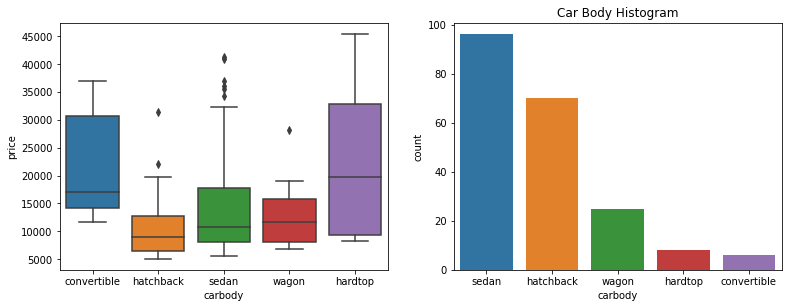

In [31]:
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)

plt.show()

It seems that **sedan** is the most favored.

**hardtop** has the highest average price.

**Price VS fuelsystem**

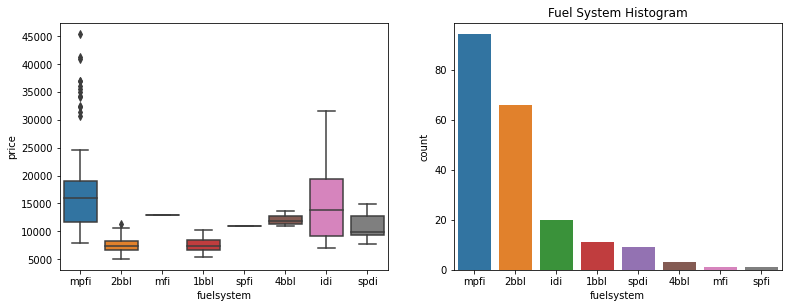

In [32]:
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)

plt.show()

**mpfi** is the most favored type of **fuelsystem**, even though it has the highest average price.

**Price VS enginetype**

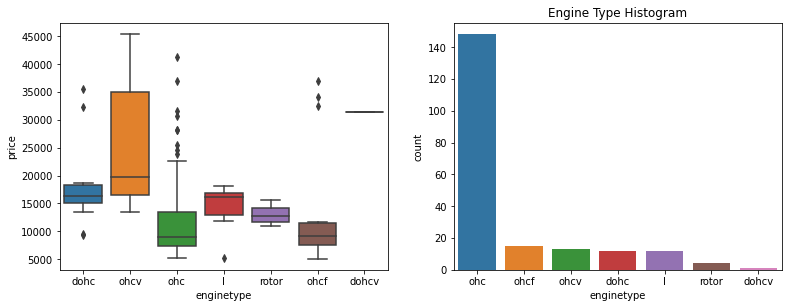

In [33]:
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)

plt.show()

**ohc** is the most favored engine type.

**Price VS cylindernumber**

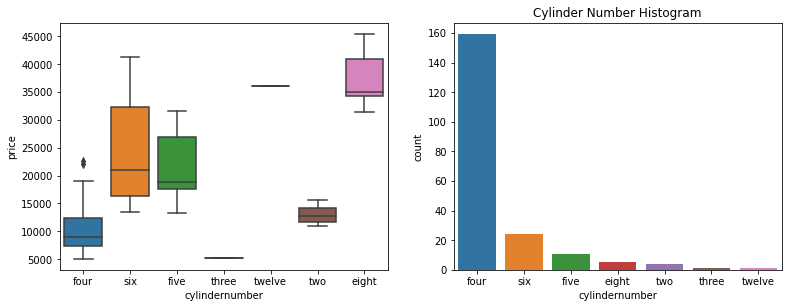

In [34]:
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)

plt.show()

The **four-cylinder** seems to be the most favored.

We can see that expensive cars have **eight-cylinder**, and **four-cylinder** are the cheapest.


**Price VS drivewheel**

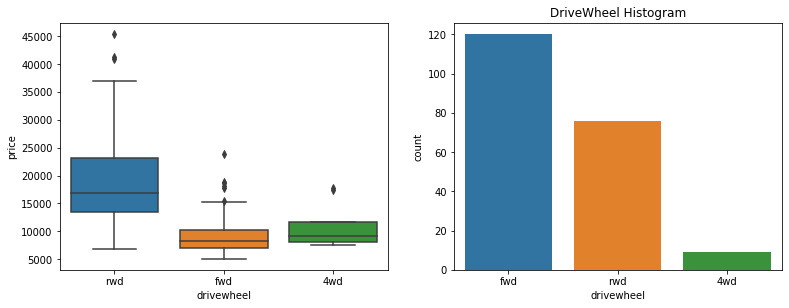

In [35]:
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)

plt.show()

**FWD** is the most favored, followed by **RWD**, and **4WD** is the least favored even though it is cheaper than **RWD**.

**Price VS symboling**

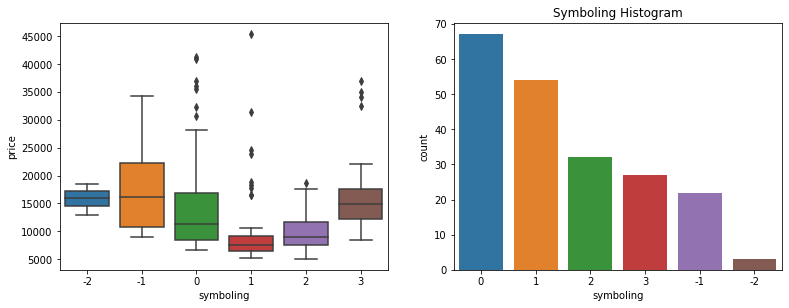

In [36]:
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)

plt.show()

It seems that **symboling** **0 and 1** are the most favored.

Cars with **symboling -1 and -2** are the most expensive, which is logical because it means that the car is more secure.

# Data preparation

In [37]:
# Remove correlated variables
data = data.drop(['carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis=1)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0,audi


**Dummy Variables creation**

In [38]:
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [39]:
data = dummies('symboling',data)
data = dummies('CompanyName',data)
data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('doornumber',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginelocation',data)
data = dummies('enginetype',data)
data = dummies('cylindernumber',data)
data = dummies('fuelsystem',data)

And here is our Dataset, all is numeric

In [40]:
data.head()

,car_ID,CarName,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,alfa-romero giulia,88.6,3.47,111,21,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,alfa-romero stelvio,88.6,3.47,111,21,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero Quadrifoglio,94.5,2.68,154,19,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,audi 100 ls,99.8,3.19,102,24,13950.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,audi 100ls,99.4,3.19,115,18,17450.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
del data['CarName']

In [42]:
del data['car_ID']

**Preparation of Train and Test data**

In [43]:
from sklearn.model_selection import train_test_split
cars_train, cars_test= train_test_split(data, train_size=0.67, test_size=0.33, random_state = 0)

**Feature Scaling: Train Set & Test Set**

In [44]:
from sklearn.preprocessing import StandardScaler,scale
#we create an object of the class StandardScaler
sc = StandardScaler() 

col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,-0.583062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,-0.680192,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,-0.755502,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,-0.680691,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,-0.917592,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# 

**Division into X_train and y_train sets for model construction**

In [45]:
y_train = cars_train.loc[:,cars_train.columns == 'price']

X_train = cars_train.loc[:, cars_train.columns != 'price']

**Division into X_test and y_test sets**

In [46]:
y_test = cars_test.loc[:,cars_test.columns == 'price']

X_test = cars_test.loc[:, cars_test.columns != 'price']

In [47]:
X_train

,wheelbase,boreratio,horsepower,citympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.720343,0.877156,0.486776,-0.509630,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
192,0.206901,-1.246785,-0.947101,1.345472,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
117,1.405042,0.988942,0.982115,-1.184212,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
47,2.193293,1.063467,1.868512,-1.690149,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Prediction and Evaluation

# 1. Prediction

**Now let's use our model to make predictions.**

In [48]:
y_train.values

array([[-0.58306223],
       [-0.68019192],
       [-0.75550172],
       [-0.68069066],
       [-0.91759234],
       [-0.79814402],
       [-0.78904201],
       [ 0.4296301 ],
       [-0.74253447],
       [-0.19379537],
       [-0.74702313],
       [ 0.05058741],
       [ 0.38698779],
       [ 1.38534134],
       [-0.61049295],
       [-0.03170475],
       [-0.65575364],
       [ 2.37820874],
       [-0.30002707],
       [-0.01985967],
       [ 0.42277242],
       [-0.52321339],
       [-0.4001492 ],
       [ 0.37975606],
       [-0.57470833],
       [-0.56523227],
       [-0.08606745],
       [-0.83155963],
       [ 0.3710281 ],
       [-0.12646542],
       [ 3.42955345],
       [ 0.31554324],
       [-0.70812138],
       [-1.01073211],
       [-0.64902065],
       [ 0.06180907],
       [-0.76123723],
       [-0.98280264],
       [-0.71273473],
       [ 0.68523454],
       [-1.02980893],
       [ 0.00507735],
       [-0.76747149],
       [ 0.56054945],
       [-0.70512894],
       [-0

In [49]:
X_train.values

array([[-0.53405416, -1.09773686, -1.10352403, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7232343 , -0.72511557, -0.92103058, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94394446, -0.98595047, -0.94710107, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.40504229,  0.98894232,  0.98211546, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.19329287,  1.06346658,  1.86851224, ...,  1.        ,
         0.        ,  0.        ],
       [-0.10839884,  1.02620445,  0.30428262, ...,  1.        ,
         0.        ,  0.        ]])

In [50]:
X_train.astype("float32")

,wheelbase,boreratio,horsepower,citympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,-0.723234,-0.725116,-0.921031,1.008180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
54,-0.943944,-0.985950,-0.947101,1.008180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
184,-0.281814,-1.246785,-1.364229,2.020054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51,-0.943944,-1.172261,-0.947101,1.008180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.720343,0.877156,0.486776,-0.509630,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
192,0.206901,-1.246785,-0.947101,1.345472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
117,1.405042,0.988942,0.982115,-1.184212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47,2.193293,1.063467,1.868512,-1.690149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
y_train

,price
155,-0.583062
97,-0.680192
54,-0.755502
184,-0.680691
51,-0.917592
...,...
67,1.508406
192,0.048717
117,0.585486
47,2.343546


In [52]:
X_test.columns

Index(['wheelbase', 'boreratio', 'horsepower', 'citympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
       'CompanyName_isuzu', 'CompanyName_jaguar', 'CompanyName_mazda',
       'CompanyName_mercury', 'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth', 'CompanyName_porsche',
       'CompanyName_renault', 'CompanyName_saab', 'CompanyName_subaru',
       'CompanyName_toyota', 'CompanyName_volkswagen', 'CompanyName_volvo',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindern

In [53]:
X_train.columns

Index(['wheelbase', 'boreratio', 'horsepower', 'citympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
       'CompanyName_isuzu', 'CompanyName_jaguar', 'CompanyName_mazda',
       'CompanyName_mercury', 'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth', 'CompanyName_porsche',
       'CompanyName_renault', 'CompanyName_saab', 'CompanyName_subaru',
       'CompanyName_toyota', 'CompanyName_volkswagen', 'CompanyName_volvo',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindern

In [54]:
# Making predictions
import statsmodels.api as sm 

lm = sm.OLS(y_train, X_train.astype("float32")).fit()
y_pred=lm.predict(X_test)

In [55]:
X_train

,wheelbase,boreratio,horsepower,citympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.720343,0.877156,0.486776,-0.509630,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
192,0.206901,-1.246785,-0.947101,1.345472,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
117,1.405042,0.988942,0.982115,-1.184212,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
47,2.193293,1.063467,1.868512,-1.690149,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [148]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              143.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):                    5.91e-58
Time:                        17:42:37   Log-Likelihood:                         -46.039
No. Observations:                 137   AIC:                                      106.1
Df Residuals:                     130   BIC:                                      126.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# 2. Evaluation

# **Residual analysis of the model**

Residuals (i.e. errors) are simply the difference between predictions and observations

In [57]:
resid = y_test - y_pred.to_frame('price')

**2-A. Normality of the error distribution**

At any time in our independent values X, the data points must be fairly close to the line, evenly distributed with only a few outliers.

A histogram of the residuals (errors) in our model can be used to check if they are normally distributed or not.

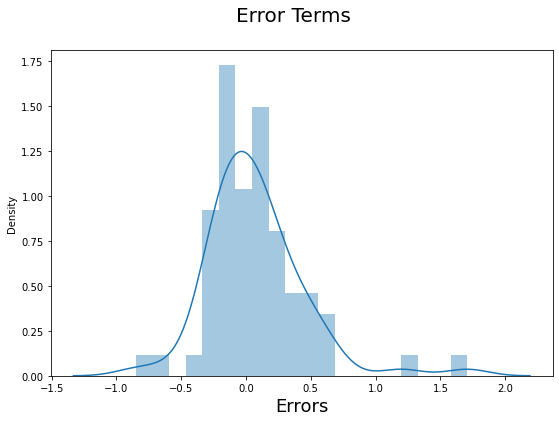

In [58]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Analysis:** The error terms are distributed around zero, which means that the prediction of the model is not random.

Another method to check, is to draw a graph of the predictions against the residualss, and see if the points are evenly distributed or not.

Text(0, 0.5, 'Residuals')

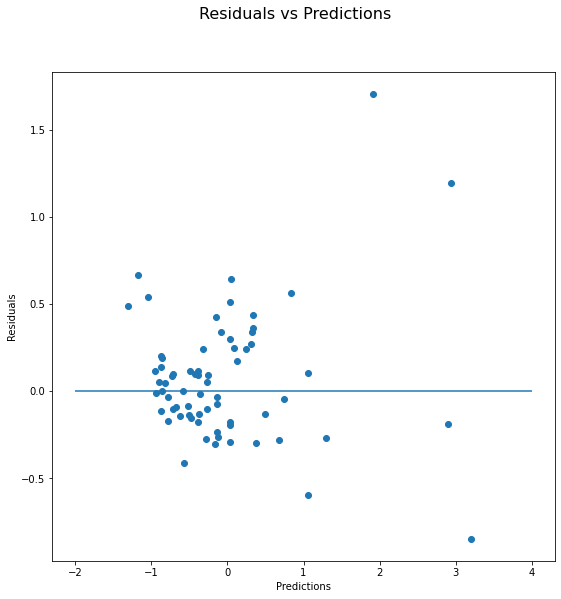

In [59]:
plt.figure(figsize=(9,9))
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)
plt.suptitle('Residuals vs Predictions', fontsize=16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

**Analysis:** We can see that the values are **evenly distributed** around 0, with only a few **outliers**.

**1. Independence of errors**

This means that the residuals (i.e errors) should not be correlated.

1. **Plot of residuals against their order.**

What must alert us is the existence of a tendency, which tells us that the errors are in fact dependent.

Text(0, 0.5, 'Residuals')

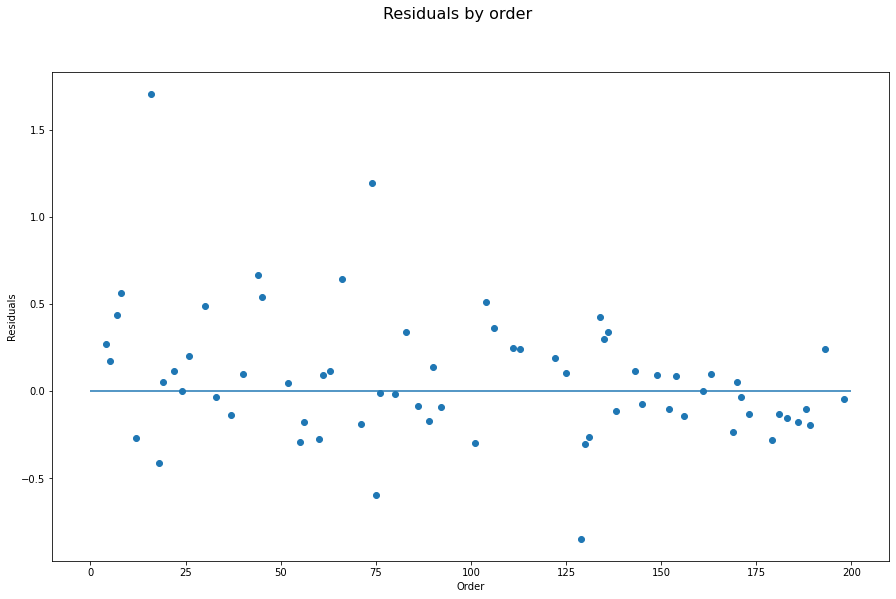

In [60]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)
plt.suptitle('Residuals by order', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Residuals')

As we see, the points are scattered randomly. no tendancy to be found.

**Analysis:**

P-Value test **Goldfeld-Quandt** > 0.05, so we accept **H0** saying that the error terms are homoscedastic, which means that the residuals have a constant variance.

Also, in the plot, the points are scattered randomly, no tendancy to be found, and the line doesn't have the form of an arch

**Evaluation of the test via the comparison of y_pred and y_test**

What we are looking for is that the errors should be as close as possible to the line, wich is the case in the plot below

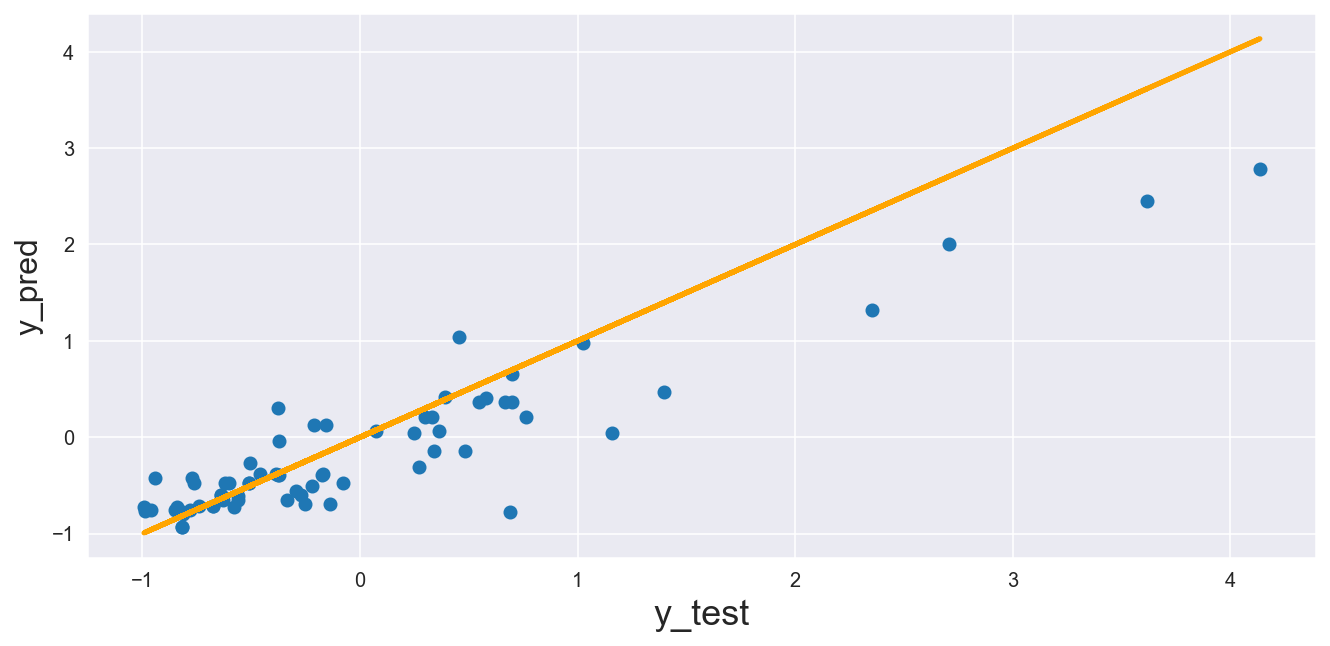

In [149]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")


# Final Summary - Part 1

**Coefficient of determination R²:**

**Recall:**

If **R² = 0**: the dependent variable Y can not be predicted from the independent variable **X**

If **R² = 1**: the dependent variable Y can be predicted from the independent variable **X**

If **0 <R² <1**: Indicates the percentage at which the dependent variable Y is predictable by **X**

In [63]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8558801049952898

# Is it good ?

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.01e-48
Time:                        16:50:57   Log-Likelihood:                 46.514
No. Observations:                 137   AIC:                             8.971
Df Residuals:                      86   BIC:                             157.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase                  0

**P-values** of some variables appear to be greater than 0.05, meaning they are statistically insignificant.

The 2nd warning says:
    
     The smallest eigenvalue is 2.4e-30. This may indicate that there are strong problems of multicollinearity or
     that the design matrix is singular.
    
Violation of hypothesis of multicollinearity. There are correlated variables between them which should not exist

**Can we do better?**

Yes, by using **RFE**

## RFE

In the section of Exploring Data, we have identified the relevant independent variables that are correlated with the independent variable Price, and which are not correlated with each other (ie no multi-collinearity), and we said that we need to keep them, and igon the rest.

To do that, we will use a mixed approach to find the relevant features:

     1.Identify these variables using RFE (Recursive Feature Elimination)

     2.Manual approach to find the right fit

The use of RFE gives us an automated way to select important attributes that can influence the dependent variable (i.e Price).

We will use a mixed approach here and initially, we will simply use the functionalities returned by RFE as a starting model.

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

Call the RFE method to have important variables

In [67]:
rfe = RFE(regression, n_features_to_select = 10)
rfe = rfe.fit(X_train,y_train)

**Extract important variables**

The **RFE()** method returns a **"support_"** array of variables considered important:

If **support_** == **True**: Important variable

If **support_** == **False**: Not important variable

In [68]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z],'\t\t\t',rfe.support_[z])

wheelbase 			 False
boreratio 			 False
horsepower 			 True
citympg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 False
CompanyName_audi 			 False
CompanyName_bmw 			 True
CompanyName_buick 			 True
CompanyName_chevrolet 			 False
CompanyName_dodge 			 False
CompanyName_honda 			 False
CompanyName_isuzu 			 False
CompanyName_jaguar 			 True
CompanyName_mazda 			 False
CompanyName_mercury 			 False
CompanyName_mitsubishi 			 False
CompanyName_nissan 			 False
CompanyName_peugeot 			 False
CompanyName_plymouth 			 False
CompanyName_porsche 			 True
CompanyName_renault 			 False
CompanyName_saab 			 False
CompanyName_subaru 			 False
CompanyName_toyota 			 False
CompanyName_volkswagen 			 False
CompanyName_volvo 			 False
fueltype_gas 			 False
aspiration_turbo 			 False
doornumber_two 			 False
carbody_hardtop 			 True
carbody_hatchback 			 True
carbody_sedan 			 True
carbody_wagon 			 True
drivewheel_fwd 			 False
driv

**The columns selected by RFE**

In [69]:
col = X_train.columns[rfe.support_]
for x in col:
    print(x)

horsepower
CompanyName_bmw
CompanyName_buick
CompanyName_jaguar
CompanyName_porsche
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
enginelocation_rear


**Using statsmodel package, for detailed statistics**

Here is our Dataset for learning, after RFE

In [70]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear
155,-1.103524,0,0,0,0,0,0,0,1,0
97,-0.921031,0,0,0,0,0,0,0,1,0
54,-0.947101,0,0,0,0,0,0,1,0,0
184,-1.364229,0,0,0,0,0,0,1,0,0
51,-0.947101,0,0,0,0,0,1,0,0,0


## I. Check the multicollinearity between the variables selected by RFE

To do that, we base ourselves on 2 things:

1.**P-Value:**

    P-Value <= **0.05** means that this particular independent variable greatly improves the fit of the model

    P-value > **0.05** no improvement

2.**VIF (Variance Inflation Factor):**

    VIF > **5**, there is an indication that multicollinearity may be present, but not enough to worry.

    VIF > **10**, there is certainly a multicollinearity among the variables.

In [71]:
model_count = 0
def statsmodel_summary(y_var,x_var) :
    global model_count
    model_count = model_count + 1
    text = "*****MODEL - " + str(model_count)
    print(text)
    
    x_var_const = sm.add_constant(x_var) # adding constant
    lm = sm.OLS(y_var,x_var_const).fit() # calculating the fit
    print(lm.summary()) # print summary for analysis
    display_vif(x_var_const.drop(['const'],axis=1))
    return x_var_const , lm

In [72]:
def display_vif(x) :
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index("Features")
    vif = vif.sort_values(by = "VIF", ascending = False)
    df = pd.DataFrame(vif.VIF).style.applymap(color_code_vif_values)
    display(df)

In [73]:
def color_code_vif_values(val):
    """
    Take a scalar and return a string with the property css 'color: red' for 10, black otherwise.
    """
    if val > 10 : color = 'red' 
    elif val > 5 and val <= 10 : color = 'blue'
    elif val > 0 and val <= 5 : color = 'darkgreen'
    else : color = 'black'
    return 'color: %s' % color


In [74]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           5.55e-57
Time:                        16:50:57   Log-Likelihood:                -41.929
No. Observations:                 137   AIC:                             103.9
Df Residuals:                     127   BIC:                             133.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.710000
CompanyName_jaguar,1.360000
carbody_hardtop,1.340000
carbody_sedan,1.240000
CompanyName_bmw,1.190000
CompanyName_buick,1.170000
carbody_wagon,1.030000


P-value analysis: P-value of **carbody_sedan** and **carbody_wagon** > **0.05**. We must delete it.

In [75]:
X_train_rfe = X_train_rfe.drop(["carbody_sedan", "carbody_wagon"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,CompanyName_porsche,carbody_hardtop,carbody_hatchback,enginelocation_rear
155,-1.103524,0,0,0,0,0,0,0
97,-0.921031,0,0,0,0,0,0,0
54,-0.947101,0,0,0,0,0,0,0
184,-1.364229,0,0,0,0,0,0,0
51,-0.947101,0,0,0,0,0,1,0


In [76]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.43e-58
Time:                        16:50:57   Log-Likelihood:                -43.391
No. Observations:                 137   AIC:                             102.8
Df Residuals:                     129   BIC:                             126.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
CompanyName_porsche,inf
enginelocation_rear,inf
horsepower,1.620000
carbody_hardtop,1.340000
CompanyName_jaguar,1.240000
CompanyName_buick,1.100000
CompanyName_bmw,1.040000
carbody_hatchback,1.020000


P-value analysis: All variables have p-value <0.05

Next step: Delete **CompanyName_porsche** because VIF> 10

In [77]:
X_train_rfe = X_train_rfe.drop(["CompanyName_porsche"], axis = 1)
X_train_rfe.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,carbody_hardtop,carbody_hatchback,enginelocation_rear
155,-1.103524,0,0,0,0,0,0
97,-0.921031,0,0,0,0,0,0
54,-0.947101,0,0,0,0,0,0
184,-1.364229,0,0,0,0,0,0
51,-0.947101,0,0,0,0,1,0


In [78]:
lm = statsmodel_summary(y_train,X_train_rfe)

*****MODEL - 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.43e-58
Time:                        16:50:57   Log-Likelihood:                -43.391
No. Observations:                 137   AIC:                             102.8
Df Residuals:                     129   BIC:                             126.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const              

,VIF
Features,
horsepower,1.620000
enginelocation_rear,1.570000
carbody_hardtop,1.340000
CompanyName_jaguar,1.240000
CompanyName_buick,1.100000
CompanyName_bmw,1.040000
carbody_hatchback,1.020000


All P-Values are less than 0.05, and all VIF values are less than 5.

Turning now to the prediction and evaluation of our model

## Prediction and Evaluation

## 1. Predictions

Creation of X_test_new by keeping only the relevant variables found by RFE.

In [79]:
#Array containing names of important variables
final_features = list(X_train_rfe.columns)

#Filter the test dataset
X_test_new = X_test.filter(final_features)

X_test_new.head()

,horsepower,CompanyName_bmw,CompanyName_buick,CompanyName_jaguar,carbody_hardtop,carbody_hatchback,enginelocation_rear
52,-0.858916,0,0,0,0,1,0
181,1.258823,0,0,0,0,0,0
5,0.151823,0,0,0,0,0,0
18,-1.340220,0,0,0,0,1,0
188,-0.088829,0,0,0,0,0,0


**Let's use our model now to make predictions.**

In [80]:
# Making predictions
lm = sm.OLS(y_train,X_train_rfe).fit()

y_pred=lm.predict(X_test_new)

In [81]:
y_pred

52    -0.841988
181    0.709920
5      0.085622
18    -1.113422
188   -0.050096
         ...   
60    -0.267243
56    -0.394122
101    0.655633
86    -0.212956
19    -0.814845
Length: 68, dtype: float64

## 2. Evaluation

**Residual analysis of the model**

In [82]:
resid = y_test - y_pred.to_frame('price')


**2-A. Independence of errors: **

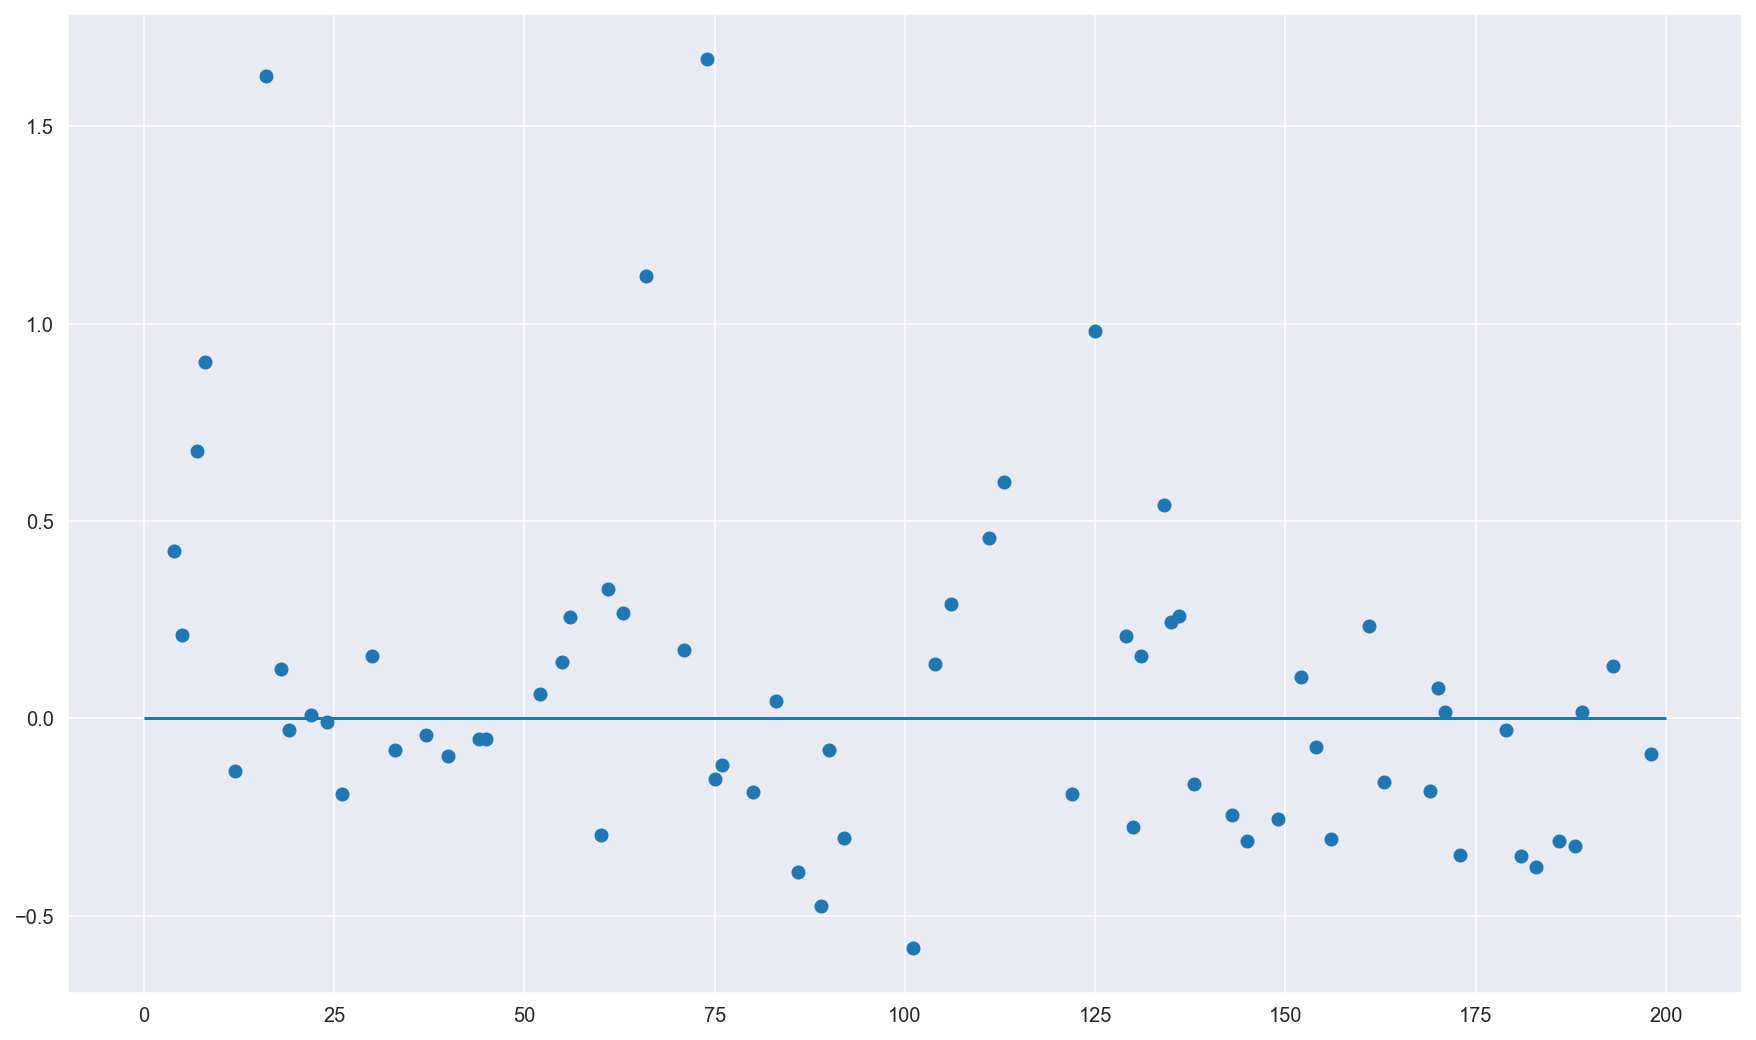

In [83]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

As we see, the points are scattered at random. no trend.

**Normality of the error distribution**

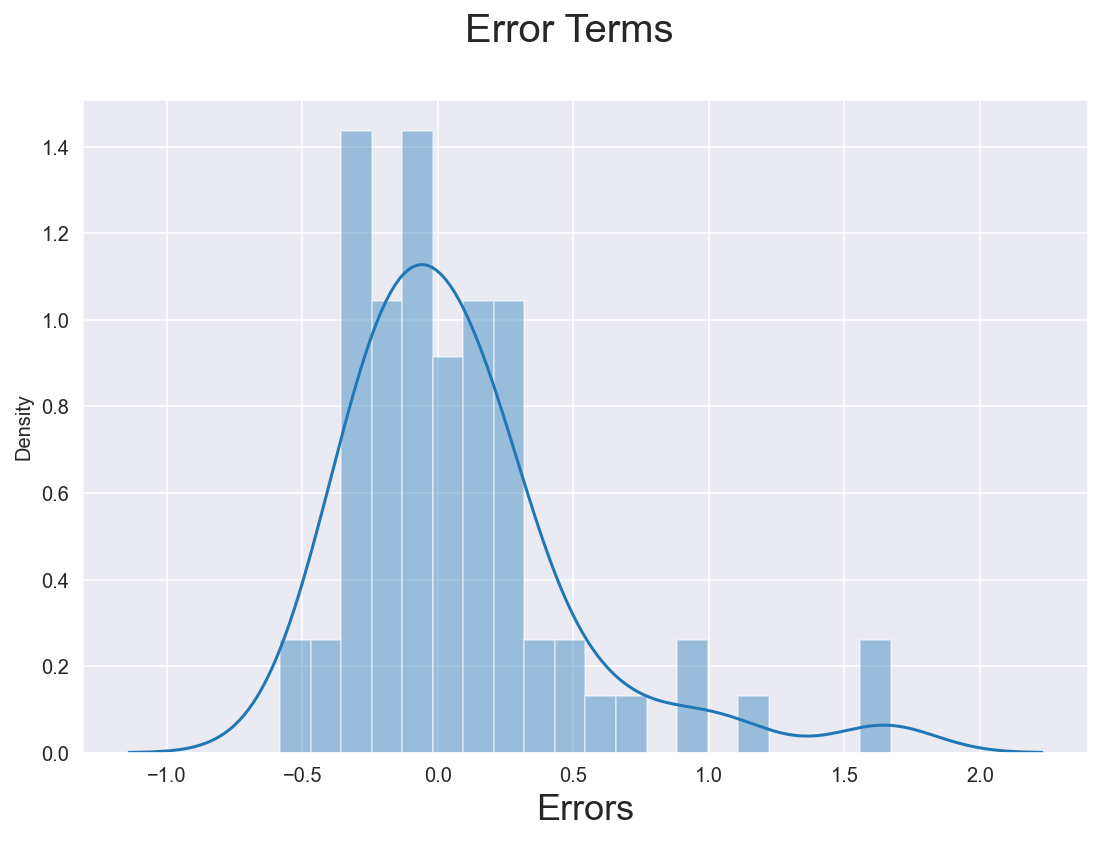

In [84]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Analysis:** The error terms are a little bit asymmetric.

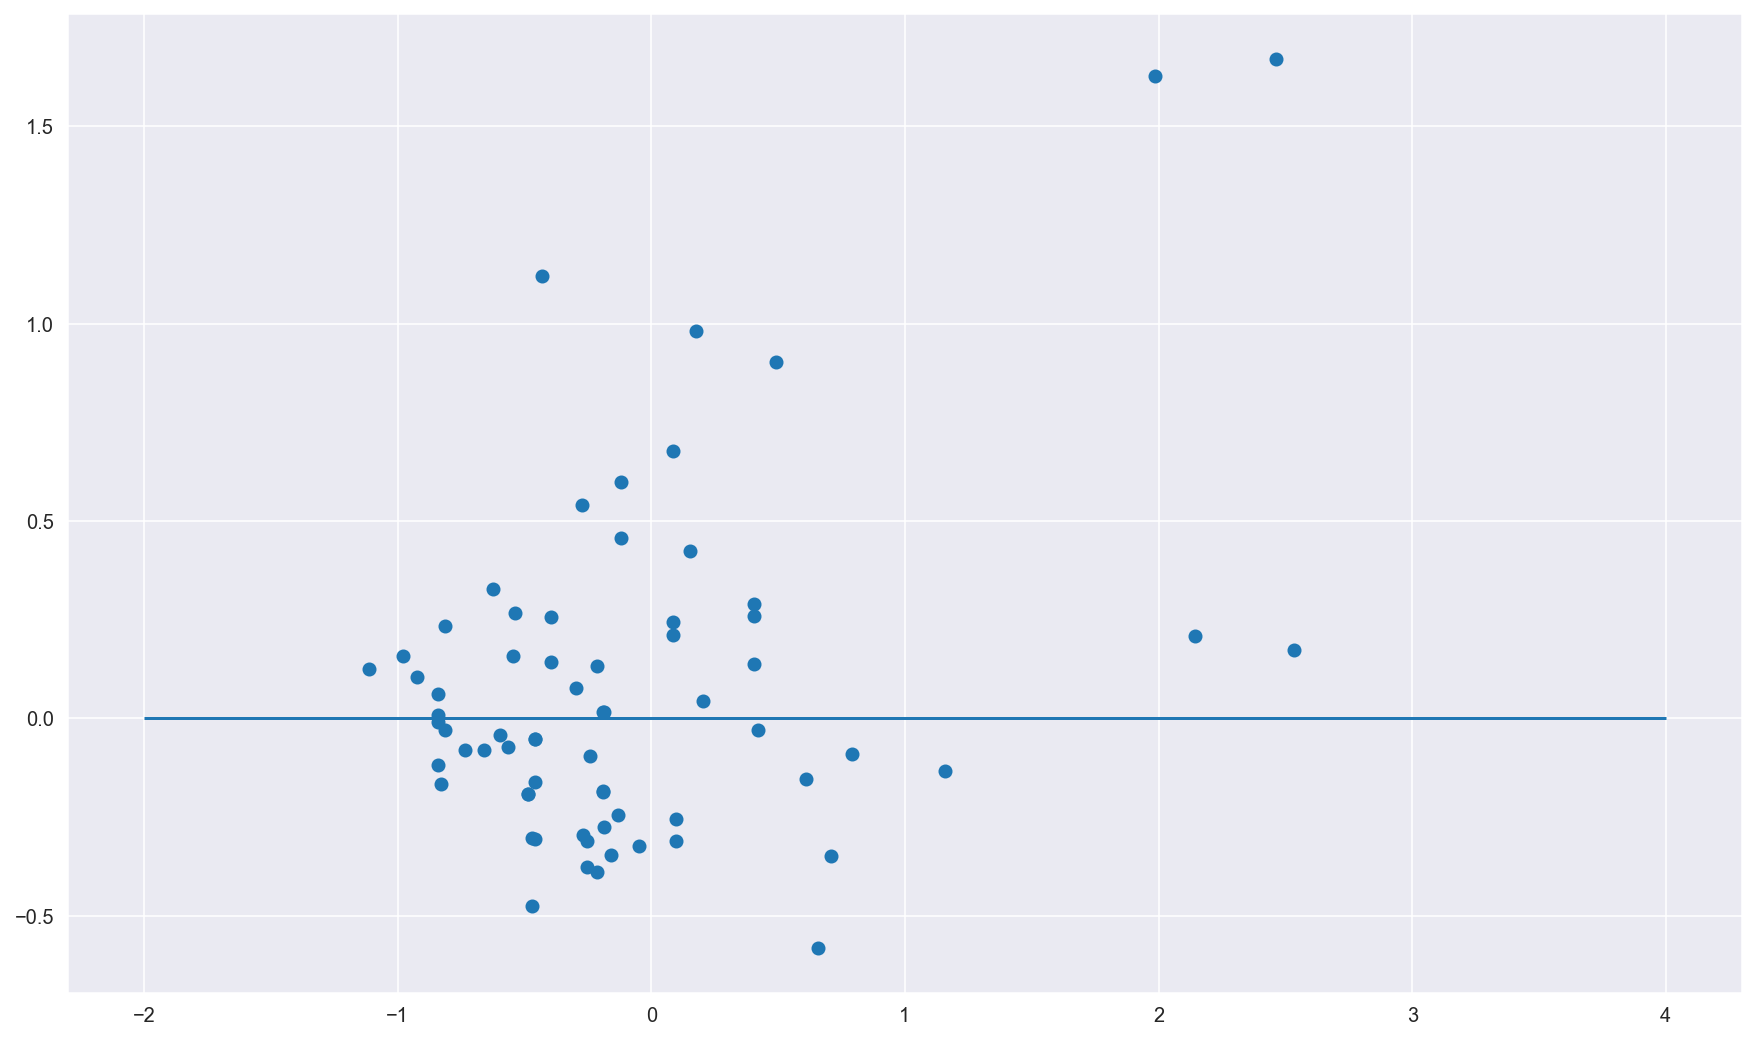

In [85]:
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)

**Analysis:** Data points are a bit more on one side than the other

**Evaluation of the test via the comparison of y_pred and y_test**

What we are looking for is that the errors should be as close as possible to the line

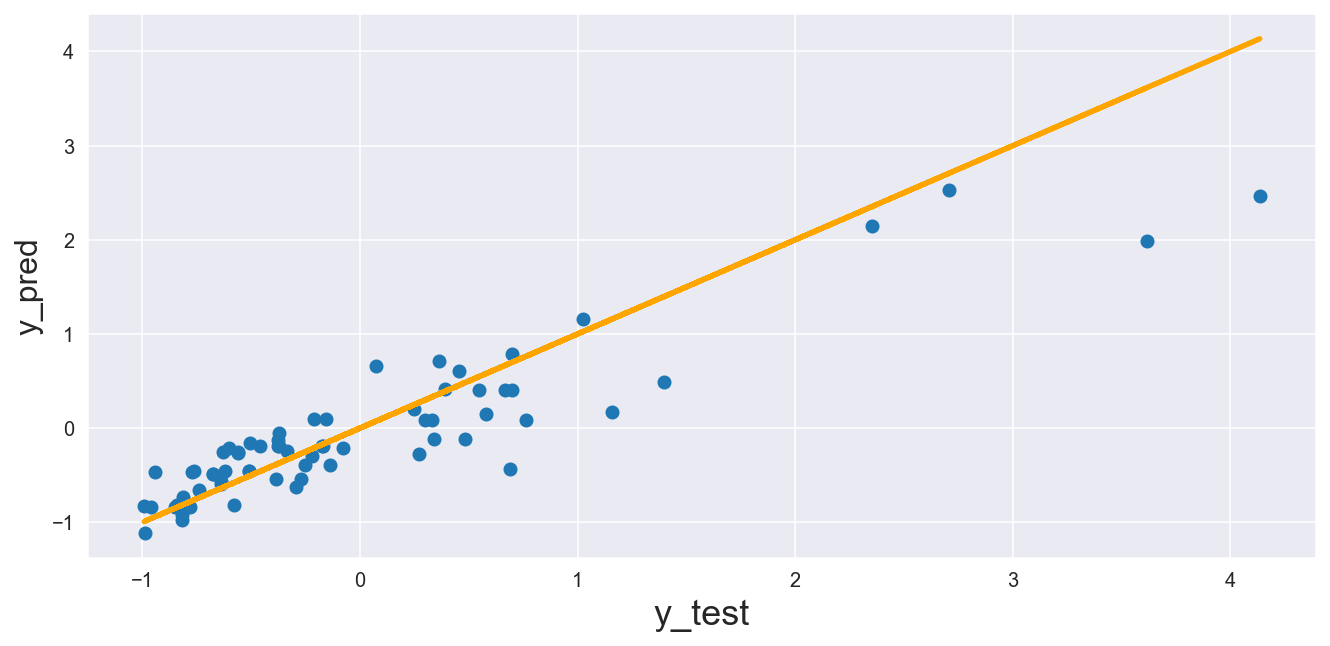

In [86]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

## Final summary of the model

**Coefficient of determination R².**

In [87]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8099546681056495

**What has changed with RFE?**

    1.R² decreased by 0.05 and remains above 0.8 which is good

    2.No multicollinearity.

In [88]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              143.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):                    5.91e-58
Time:                        16:50:59   Log-Likelihood:                         -46.039
No. Observations:                 137   AIC:                                      106.1
Df Residuals:                     130   BIC:                                      126.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_rfe, y_train)

y_pred = tree_reg.predict(X_test_new)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.4414586879155195

In [91]:
y_test

,price
52,-0.779756
181,0.360472
5,0.296808
18,-0.989084
188,-0.372304
...,...
60,-0.563297
56,-0.136746
101,0.073855
86,-0.602260


### Evaluation

**Residual analysis of the model**

In [92]:
y_pred = pd.Series(y_pred).to_frame('price')

In [93]:
y_pred

,price
0,-0.715228
1,0.061684
2,0.116878
3,-0.706500
4,-0.063499
...,...
63,-0.574708
64,-0.696567
65,0.061684
66,-0.318730


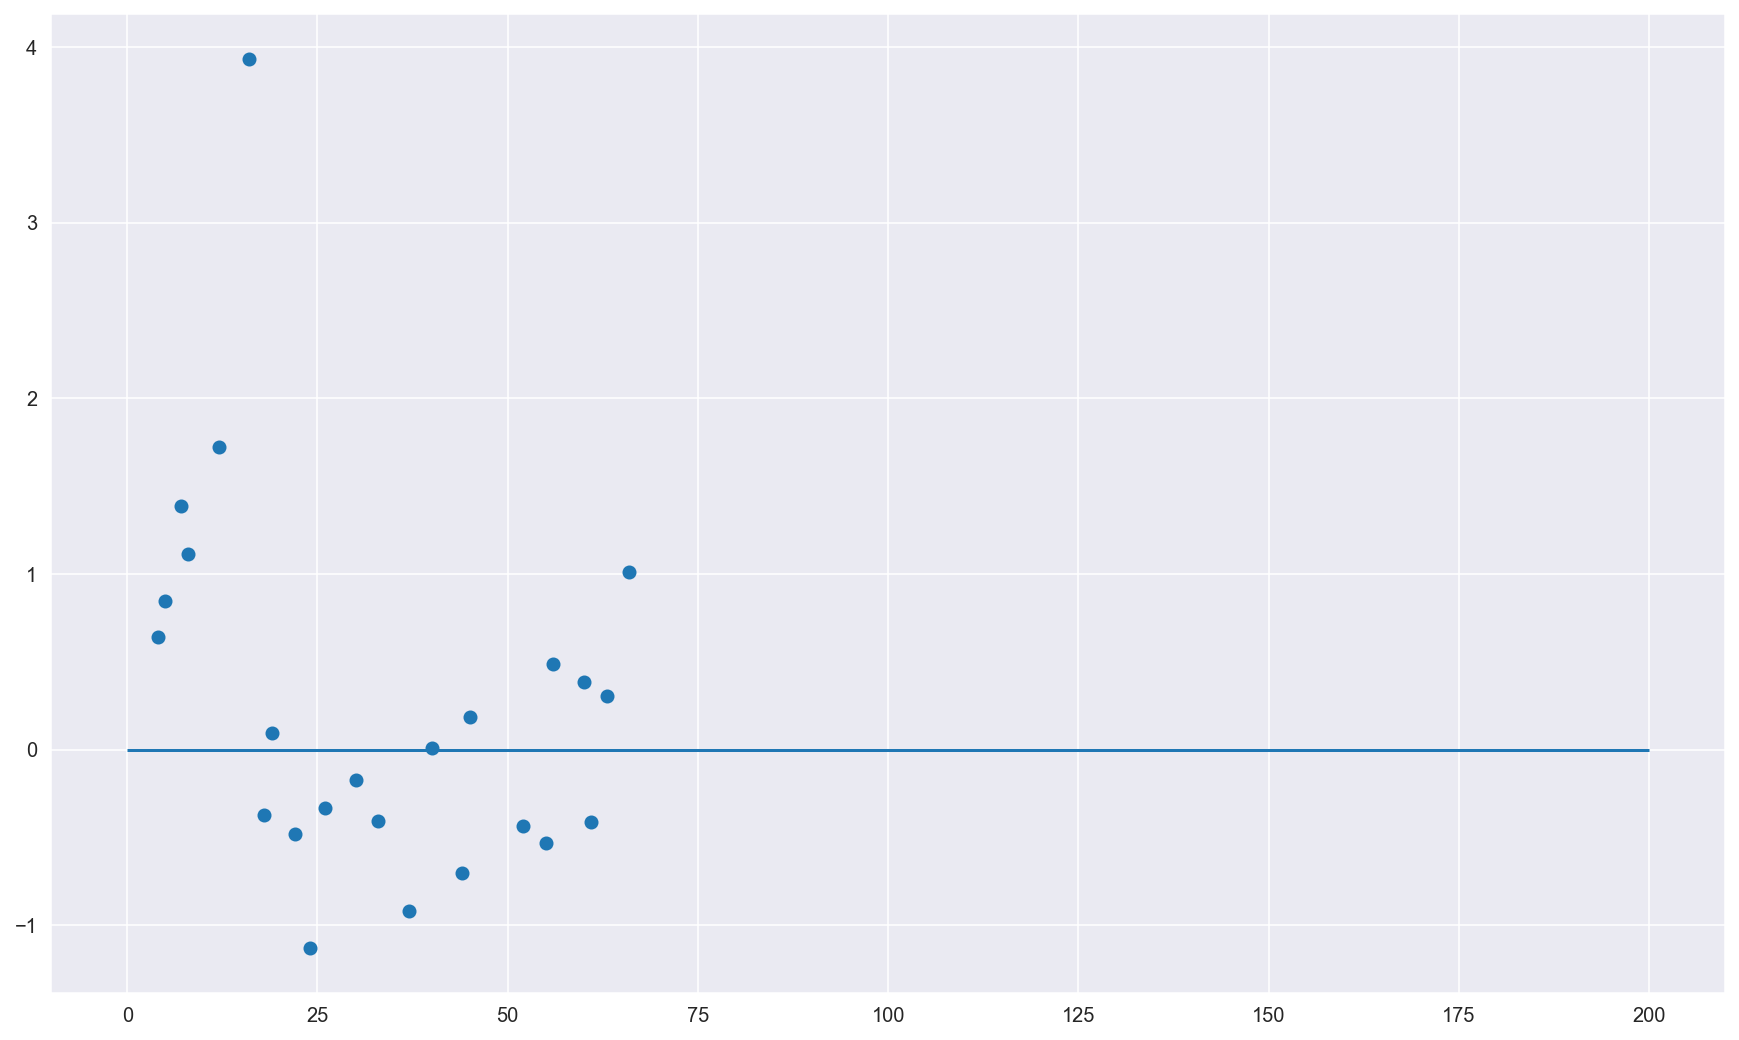

In [96]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

As we see, the points are scattered at random. no trend.

**Normality of error distribution**

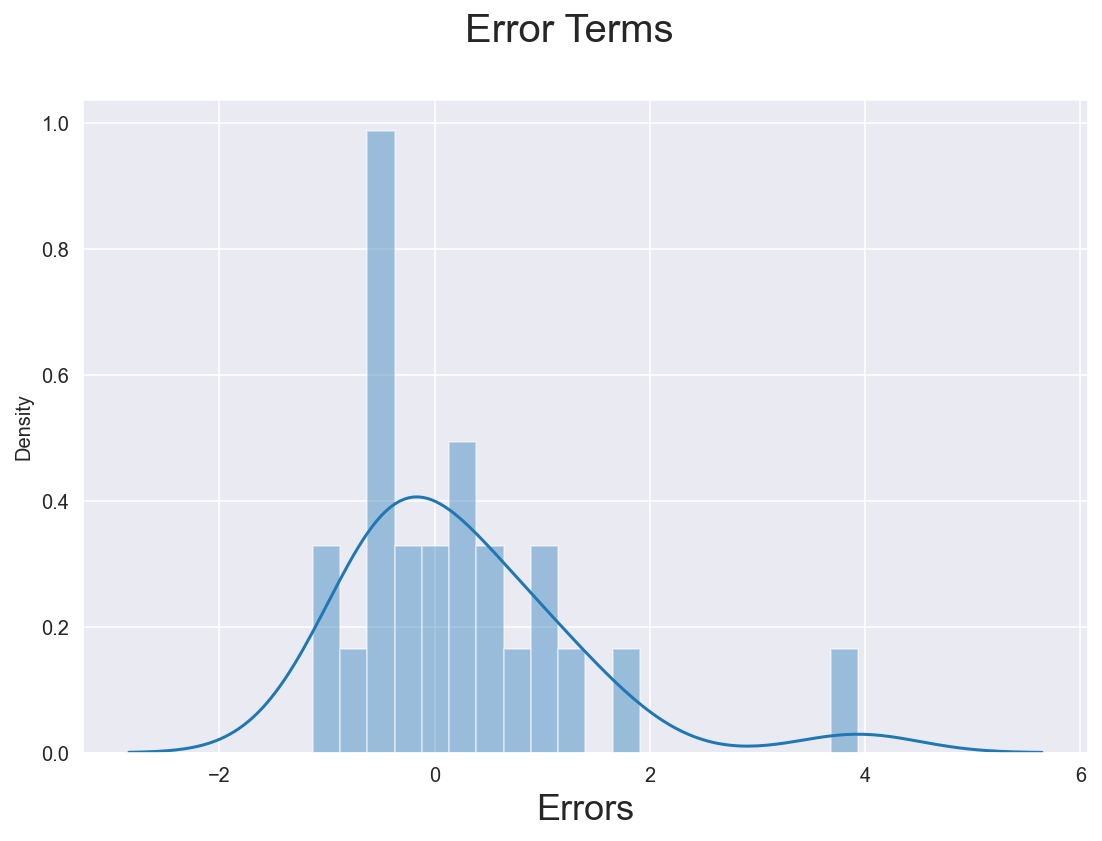

In [97]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Analysis:** The error terms are a little bit asymmetric.

In [98]:
y_pred

,price
0,-0.715228
1,0.061684
2,0.116878
3,-0.706500
4,-0.063499
...,...
63,-0.574708
64,-0.696567
65,0.061684
66,-0.318730


In [99]:
y_test

,price
52,-0.779756
181,0.360472
5,0.296808
18,-0.989084
188,-0.372304
...,...
60,-0.563297
56,-0.136746
101,0.073855
86,-0.602260


In [119]:
def treat_y_test(y_test):
    y_test_new = pd.DataFrame(y_test)
    y_test_new = y_test_new.reset_index()
    del y_test_new['index']
    return y_test_new

In [120]:
resid = treat_y_test(y_test) - y_pred

In [121]:
resid

,price
0,-0.064528
1,0.298788
2,0.179929
3,-0.282584
4,-0.308805
...,...
63,0.011411
64,0.559821
65,0.012171
66,-0.283530


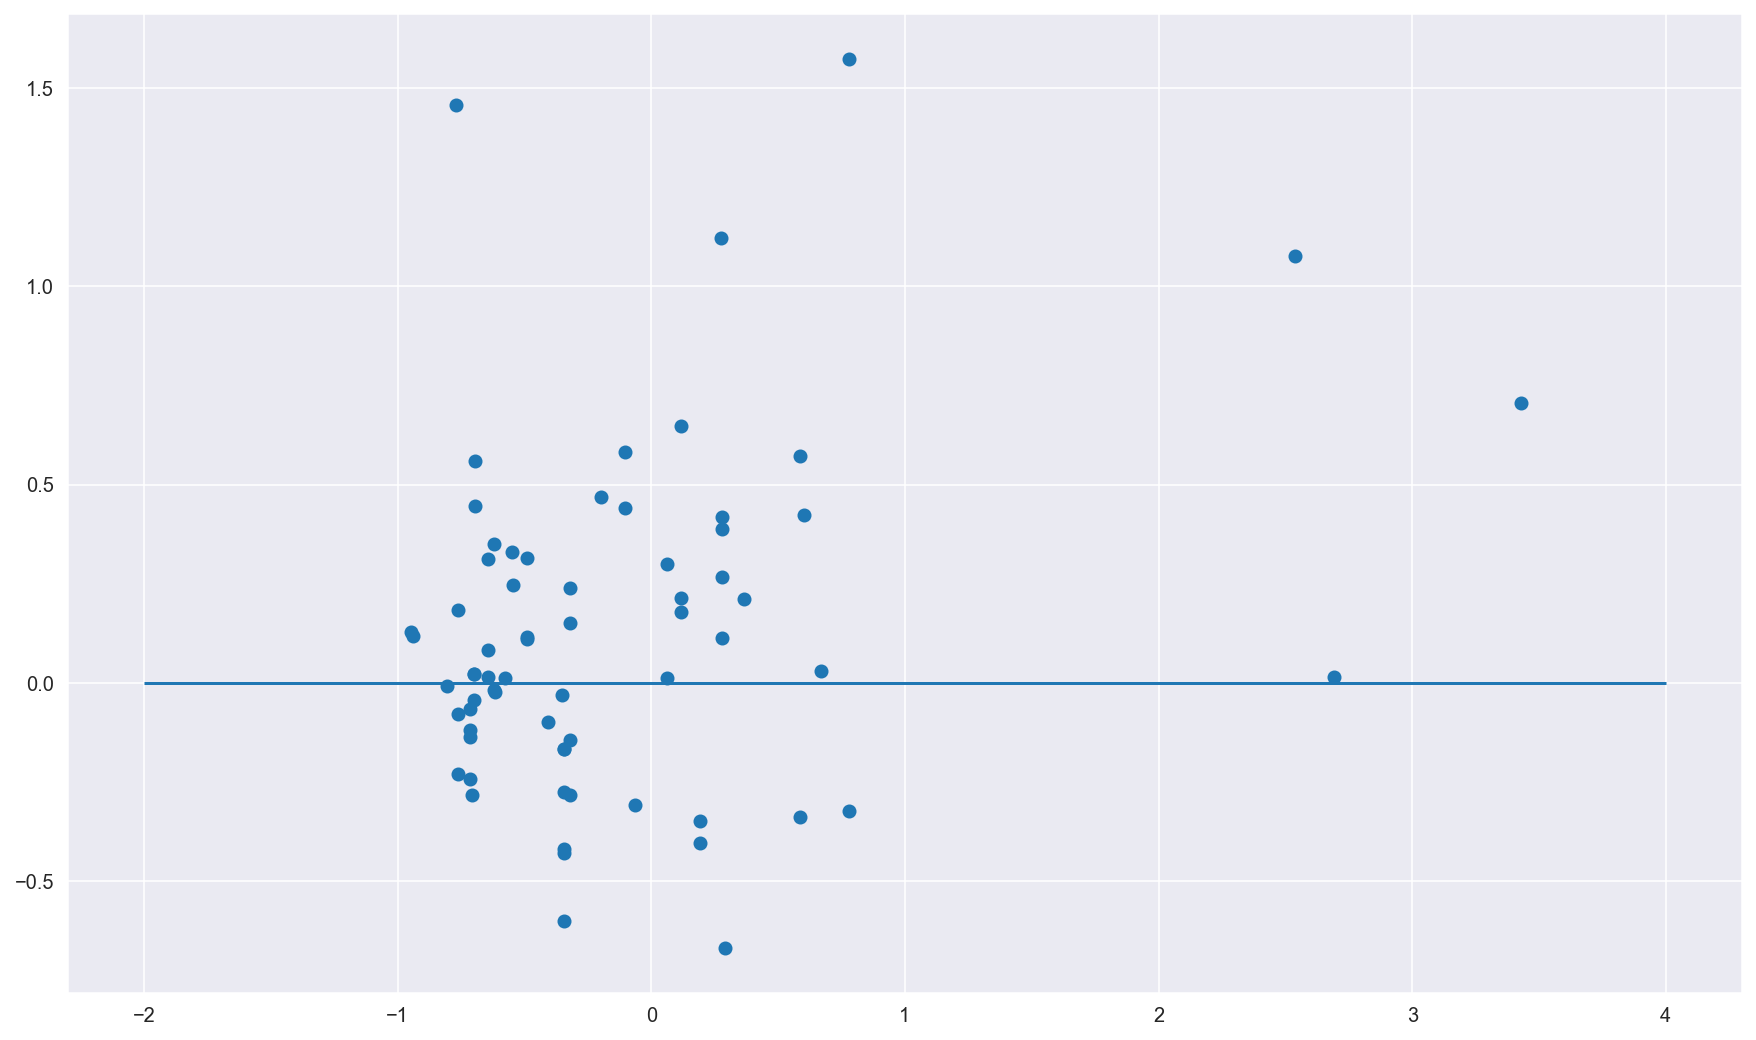

In [122]:
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)

**Analysis:** Data points are a bit more on one side than the other

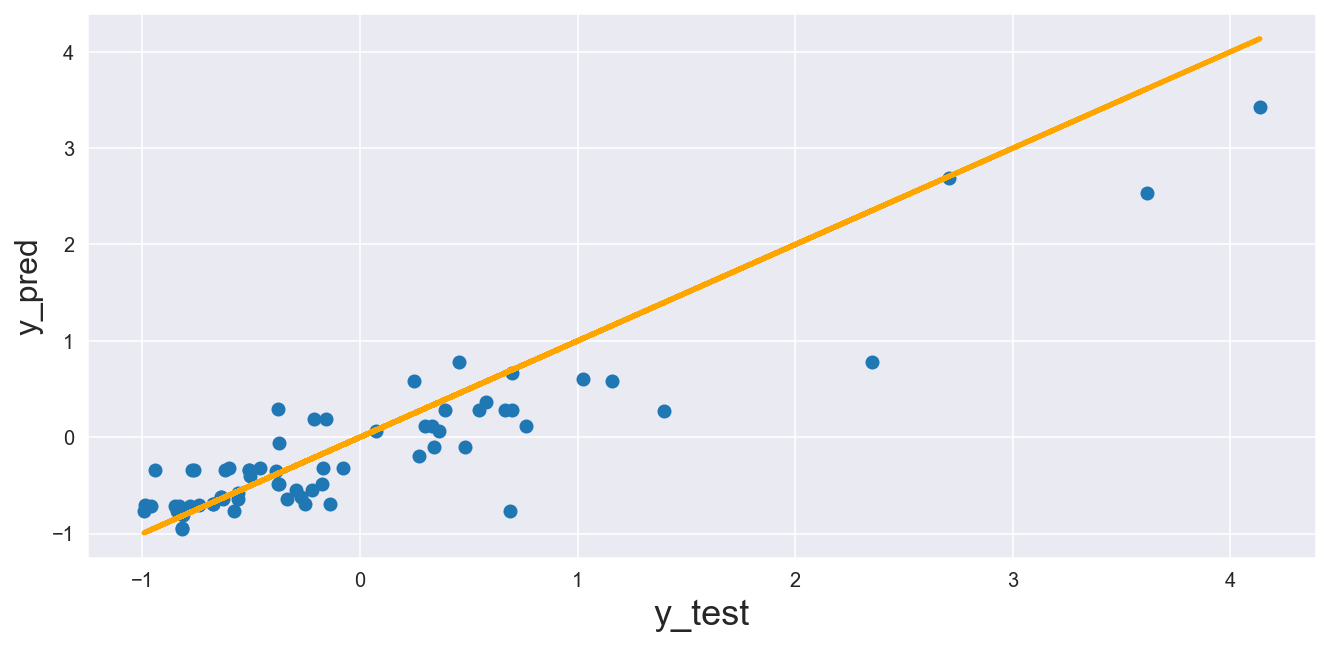

In [123]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

In [124]:
r2_score(y_test, y_pred)

0.8051142268639079

**R2 Score is 80.5% which means 80.5% of the variability can be explained by the independent variables**

In [126]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train_rfe, y_train)

y_pred = forest_reg.predict(X_test_new)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4492283367788205

In [127]:
y_test

,price
52,-0.779756
181,0.360472
5,0.296808
18,-0.989084
188,-0.372304
...,...
60,-0.563297
56,-0.136746
101,0.073855
86,-0.602260


### Evaluation

**Residual analysis of the model**

In [128]:
y_pred = pd.Series(y_pred).to_frame('price')

In [129]:
y_pred

,price
0,-0.752832
1,0.068430
2,0.207137
3,-0.766075
4,-0.039934
...,...
63,-0.615194
64,-0.691555
65,0.068430
66,-0.471631


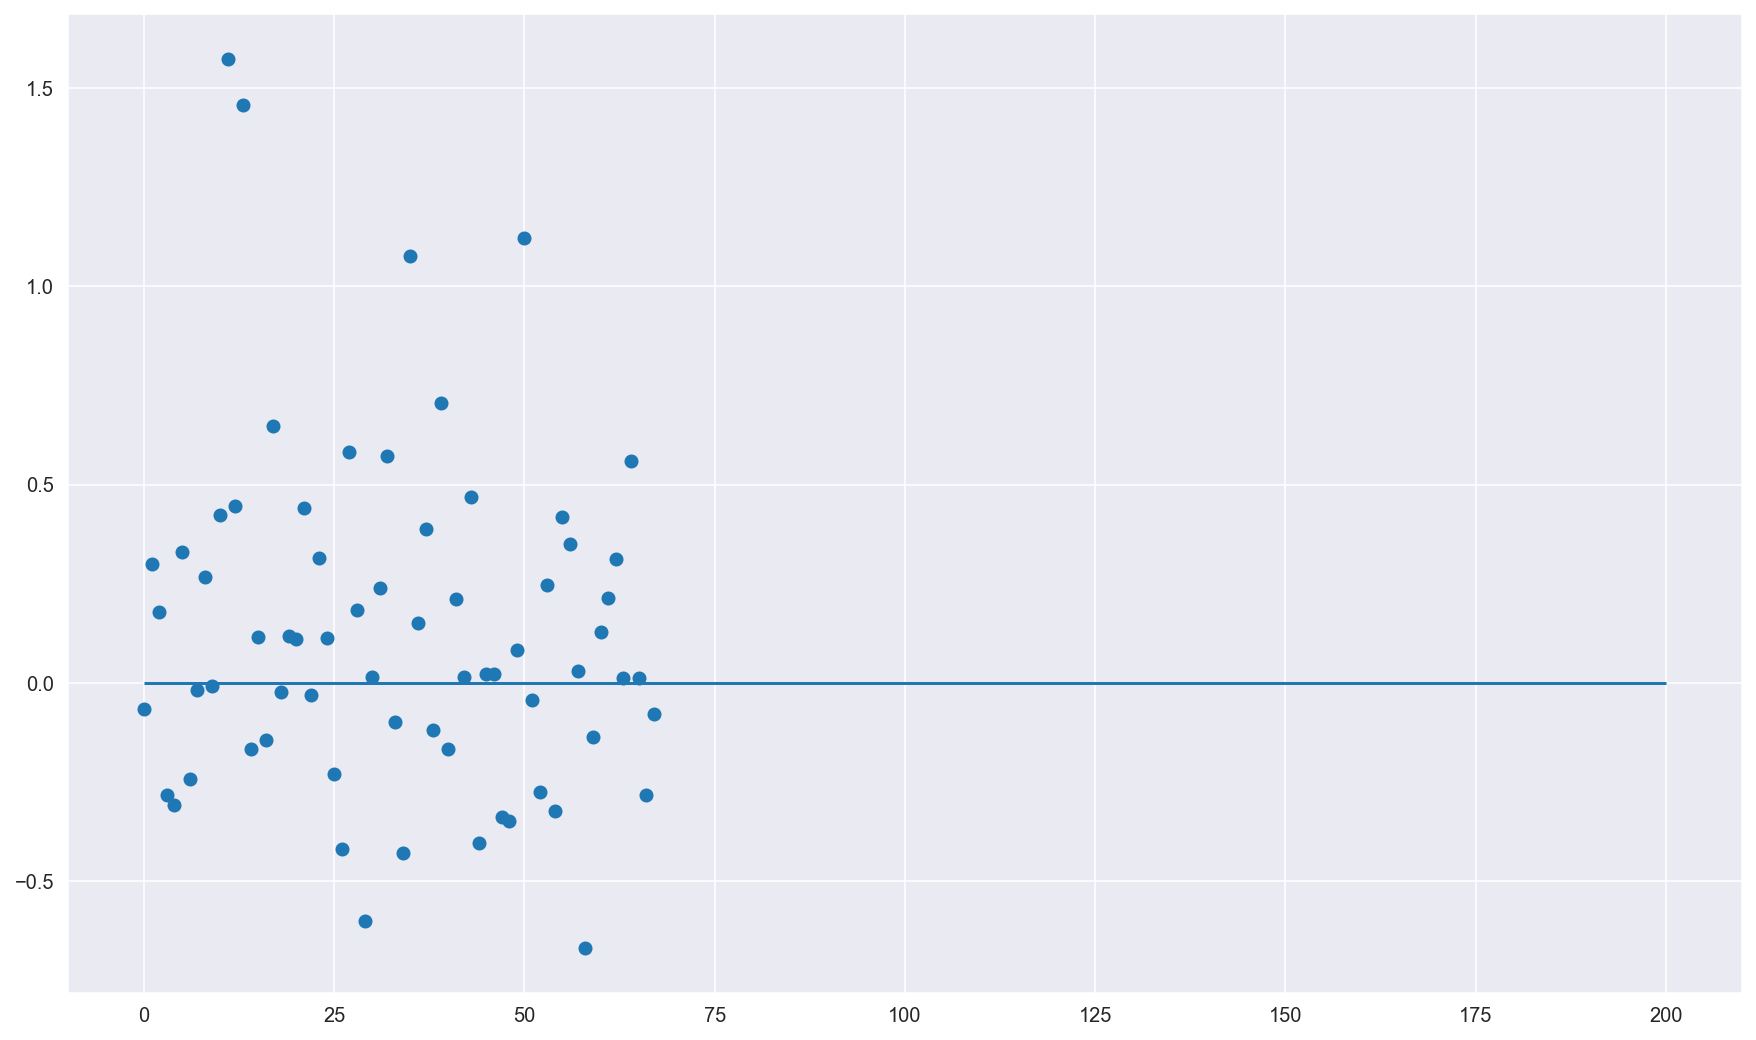

In [130]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

As we see, the points are scattered at random. no trend.

**Normality of error distribution**

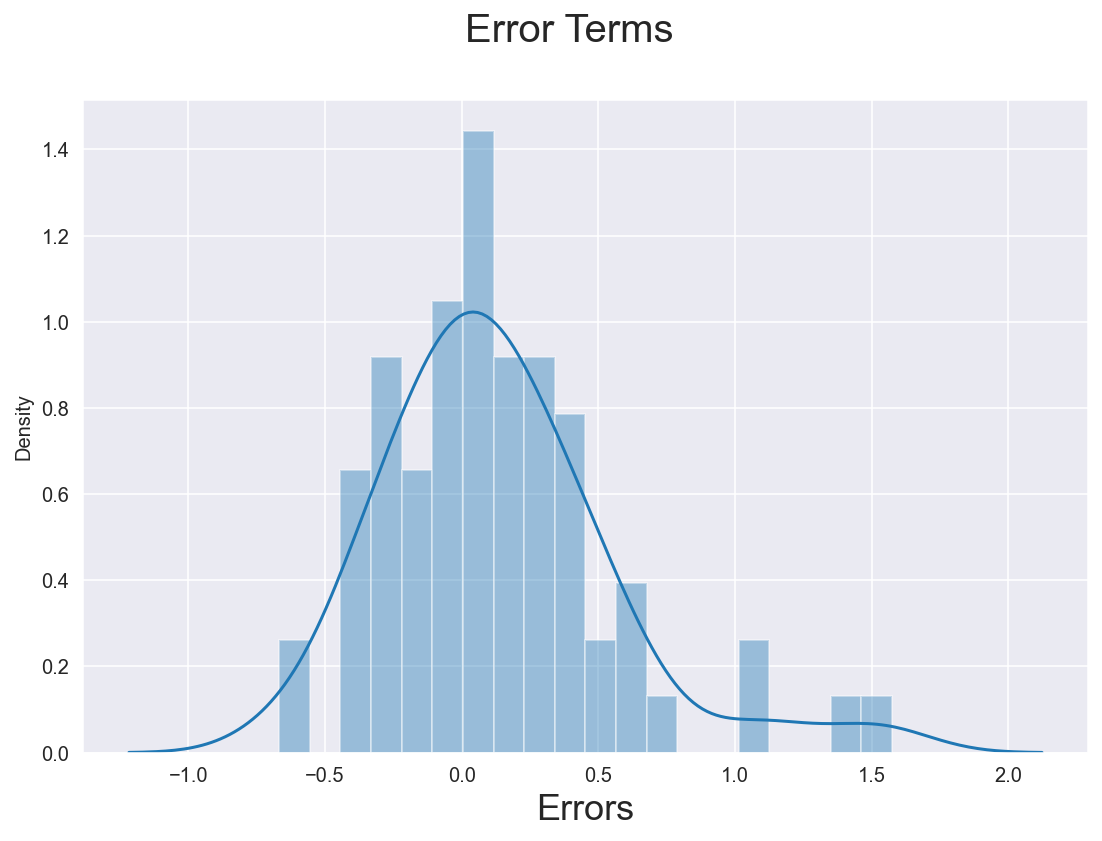

In [131]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Analysis:** The error terms are symmetric.

In [132]:
y_pred

,price
0,-0.752832
1,0.068430
2,0.207137
3,-0.766075
4,-0.039934
...,...
63,-0.615194
64,-0.691555
65,0.068430
66,-0.471631


In [133]:
y_test

,price
52,-0.779756
181,0.360472
5,0.296808
18,-0.989084
188,-0.372304
...,...
60,-0.563297
56,-0.136746
101,0.073855
86,-0.602260


In [138]:
resid = treat_y_test(y_test) - y_pred

In [139]:
resid

,price
0,-0.026924
1,0.292042
2,0.089671
3,-0.223009
4,-0.332370
...,...
63,0.051896
64,0.554809
65,0.005425
66,-0.130629


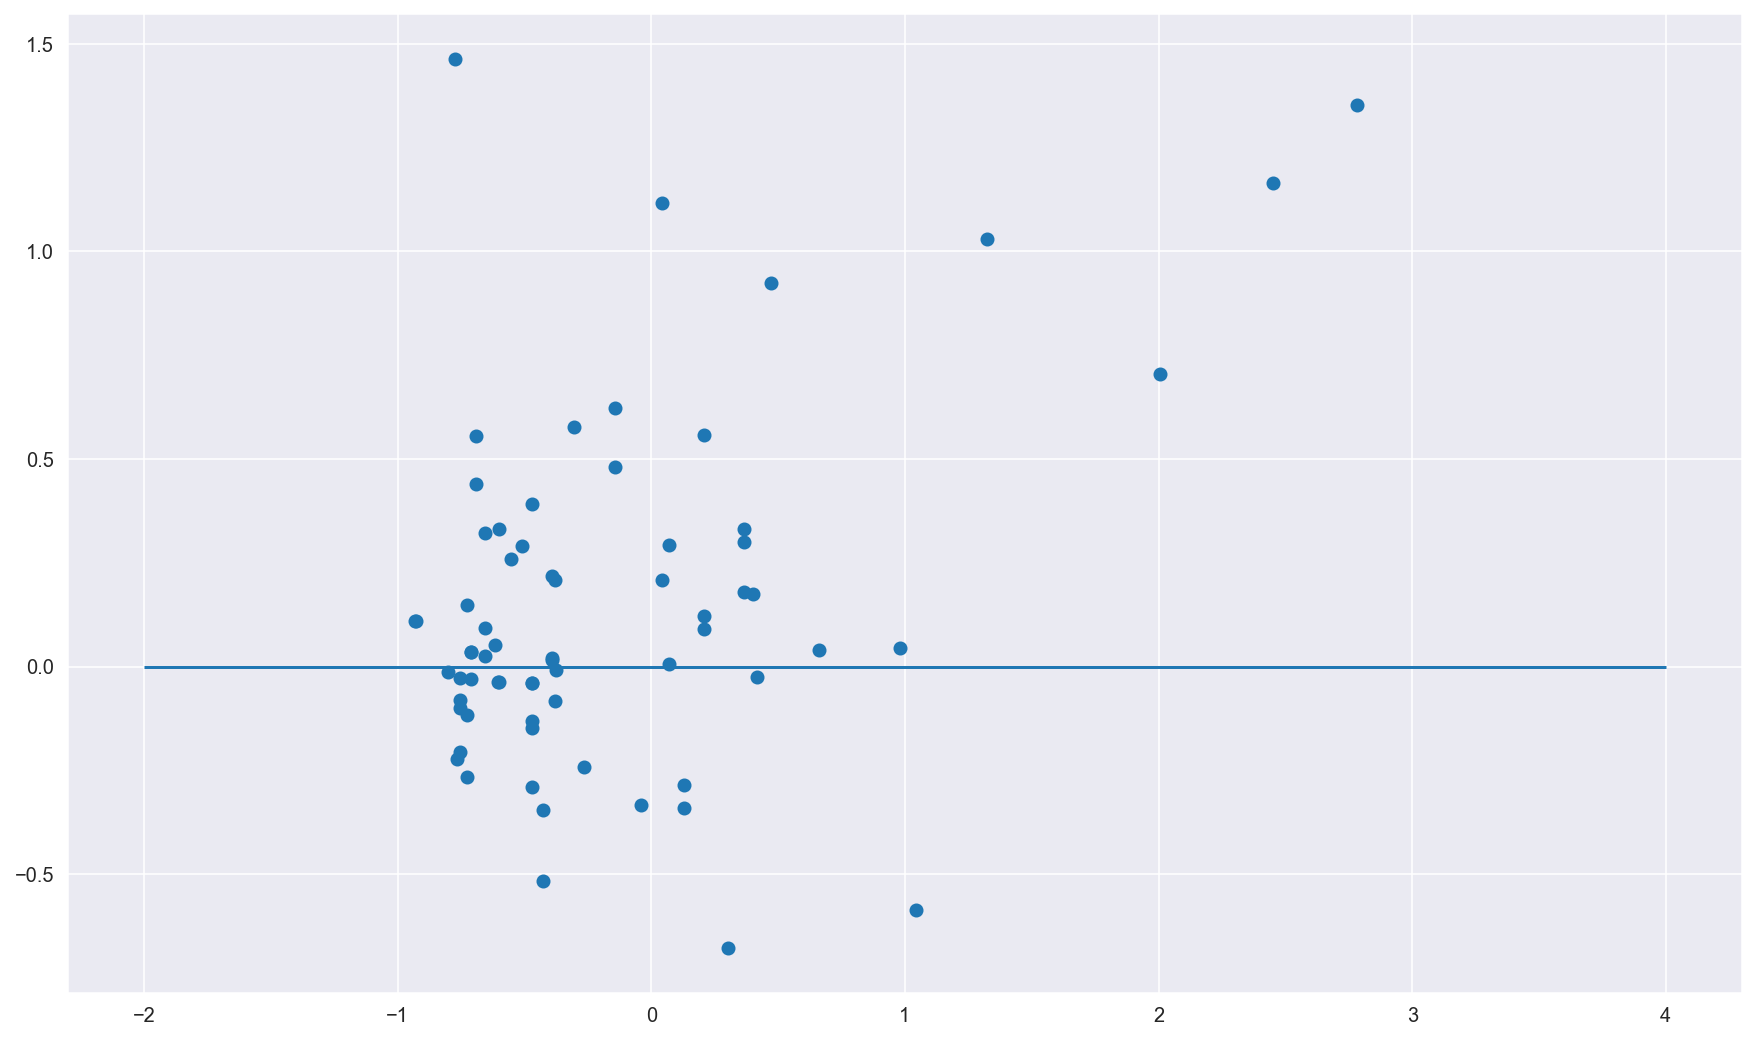

In [140]:
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)

**Analysis:** Data points are a bit more on one side than the other

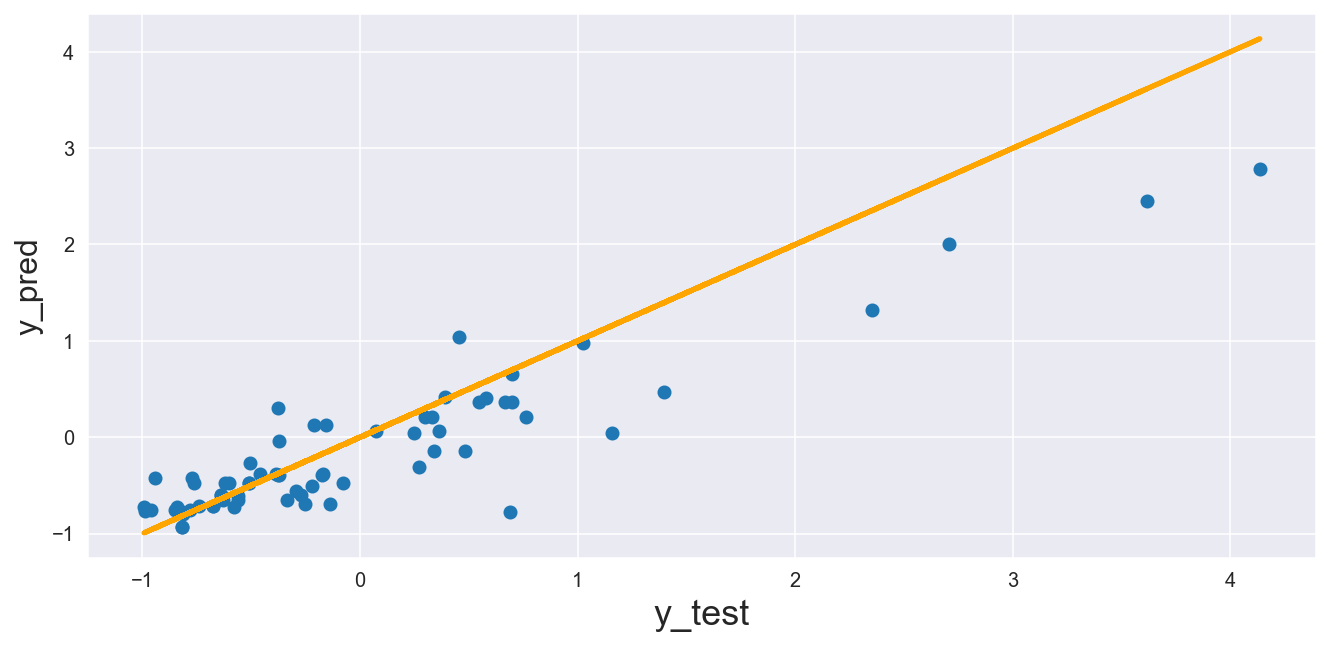

In [141]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

In [142]:
r2_score(y_test, y_pred)

0.7981939014349346

**An R2 score of 79% suggests that the independent variables were able to capture 79% variablitiy of the dependent variable**

## Conclusion: Ordinary Least Squared Regression gave the best r2 score.